In [1]:
import numpy as np 
import pandas as pd
# 시각화 package
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree   
import missingno as msno # 결측치를 시각화적으로

# 1. EDA

1. battery_power    
    - 배터리 전력(mAh), 수치형
2. blue
    - 블루투스 유무, 범주형
3. clock_speed
    - 마이크로프로세서 클럭 속도, 수치형
    - 마이트로프로세서는 cpu의 핵심 기능을 통합한 직접 회로
    - 클록 구동 방식, 레지스터 기반
    - 빠른 속도록 동작, 토장 수백만개의 명령 실행 가능
    - 작은 크기
    - 동일한 칩을 프로그램 변경으로 많은 용도에 사용 가능, 다재다능
    - 낮은 전력 소비량
    - 낮은 발열량
    - 매우 신뢰할수 있고 고장률 낮음
    - 크기와 전력 소비가 적어 휴대 가능
    - 클럭 신호를 사용하여 명령이 실행되는 속도를 제어하고, 다른 내부 구성 요소를 동기화하고, 명령 간의 데이터 전송을 제어.
    - 클럭 속도는 마이크로프로세서가 명령을 실행하는 속도를 말함, Hz로 표시.
4. dual_sim
    - sim카드 두개 장착 가능한지, 범주형
5. fc
    - 전면 카메라의 Mega 픽셀 수, 수치형
6. four_g
    - 4G 지원 여부, 범주형
7. int_memory
    - 내장메모리(Gbyte), 수치형
8. m_dep
    - 휴대폰 두께(cm), 수치형
9. mobile_wt
    - 휴대폰 무게, 수치형
10. n_cores
    - 프로세서의 코어 갯수, 수치형
11. pc
    - 후면 카메라 Mega 필셀 수, 수치형
12. px_height
    - 픽셀 해상도 높이
13. px_width
    - 픽셀 해상도 폭
14. ram
    - RAM(MB), 수치형
15. sc_h
    - 화면 높이(cm), 수치형
16. sc_w
    - 화면 너비(cm), 수치형
17. talk_time
    - 1회 충전 후 쓸 수 있는 배터리 시간, 수치형
18. three_g
    - 3G인지 아닌지, 범주형
    - 4G이면 당연히 3G인지 체크(당연하겠지만)
    - 4G 아닐때 3G인지 아닌지
    - 3G도 아니라면 1G, 2G아니면 5G인지
19. touch_screen
    - 터치 스크린이 있는지, 범주형
    - four_g, three_g 둘 다 0일때 1인지 0인지
20. wifi
    - 와이파이 있는지 여부, 범주형
21. price_range
    - 가격 볌위, 범주형
    - 0: low
    - 1: medium
    - 2: high
    - 3: expensive

In [2]:
mobile_price = pd.read_csv('mobile_price_classification.csv')
mobile_price

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
mobile_price.shape

(2000, 21)

In [4]:
mobile_price.size

42000

In [6]:
mobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# 요약 통계량
mobile_price.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
mobile_price.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [8]:
# 결측치 개수
mobile_price.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

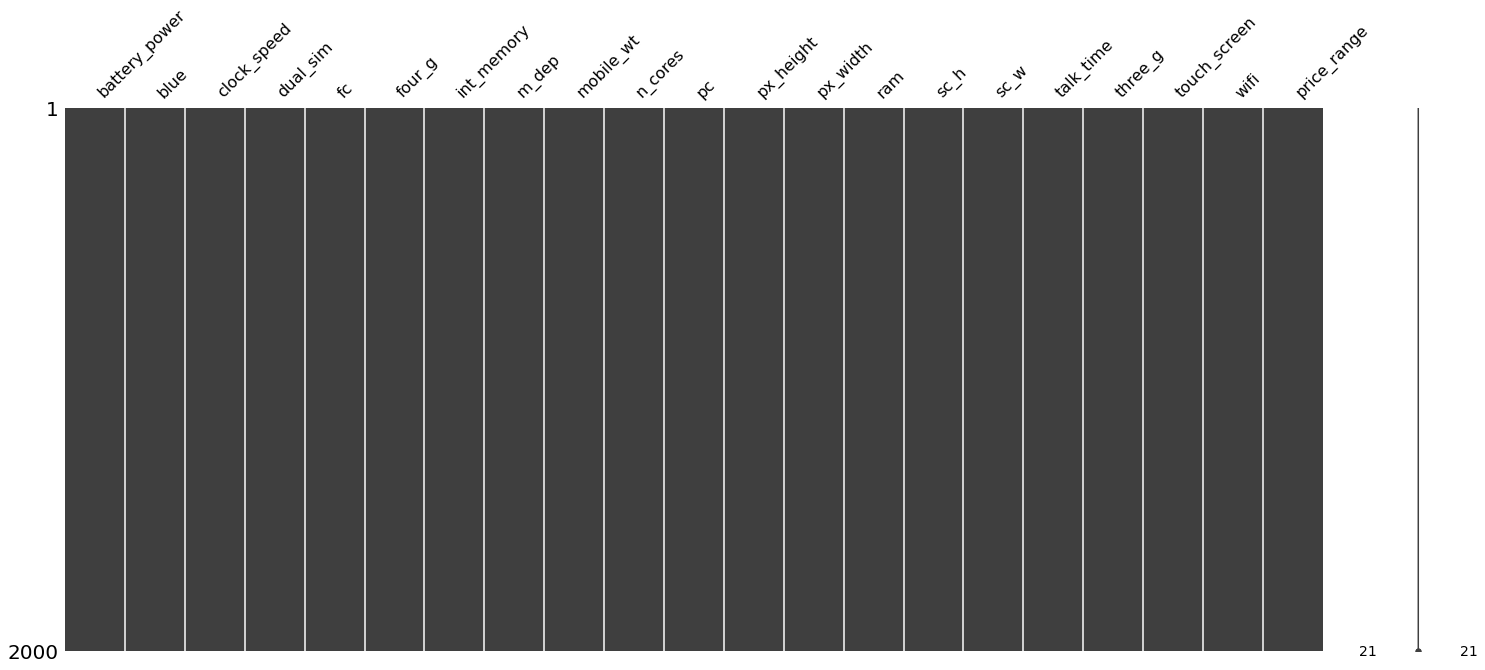

In [5]:
msno.matrix(mobile_price)
plt.savefig('./isnull.png', bbox_inches="tight")
plt.show()

In [10]:
mobile_price['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


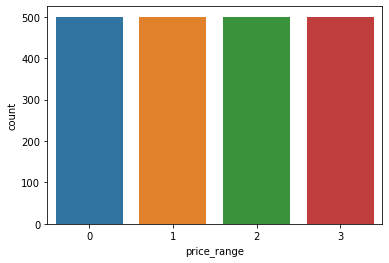

In [6]:
sns.countplot(mobile_price['price_range'])
plt.savefig('./price_range.png', bbox_inches="tight")

In [13]:
mobile_price['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:>

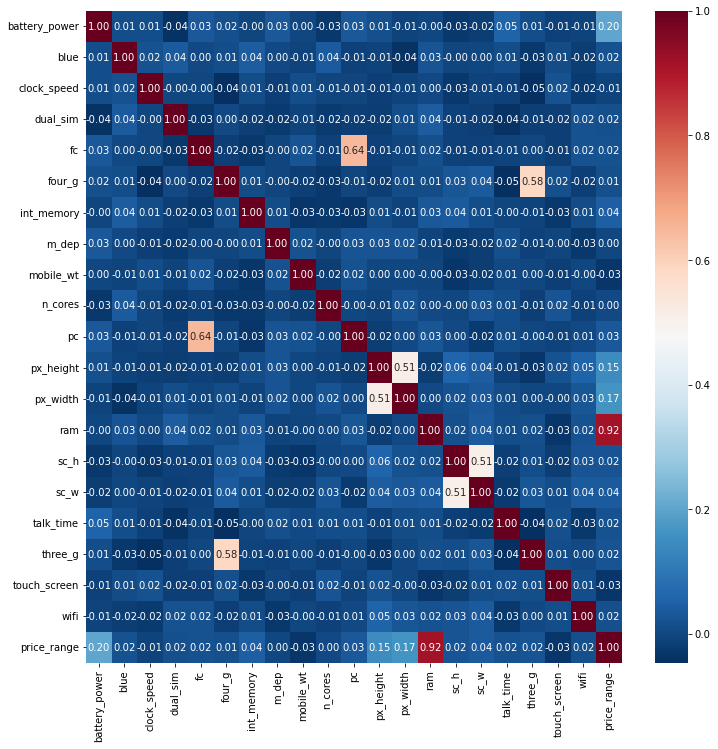

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(mobile_price.corr(), annot = True, fmt = '.2f', cmap = 'RdBu_r')
# plt.savefig('./heatmap3.png', bbox_inches="tight")

In [ ]:
sns.pairplot(mobile_price, kind='scatter',height=8, hue='price_range', palette='husl')
plt.savefig('./pairplot_2.png', dpi=100, bbox_inches="tight")

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


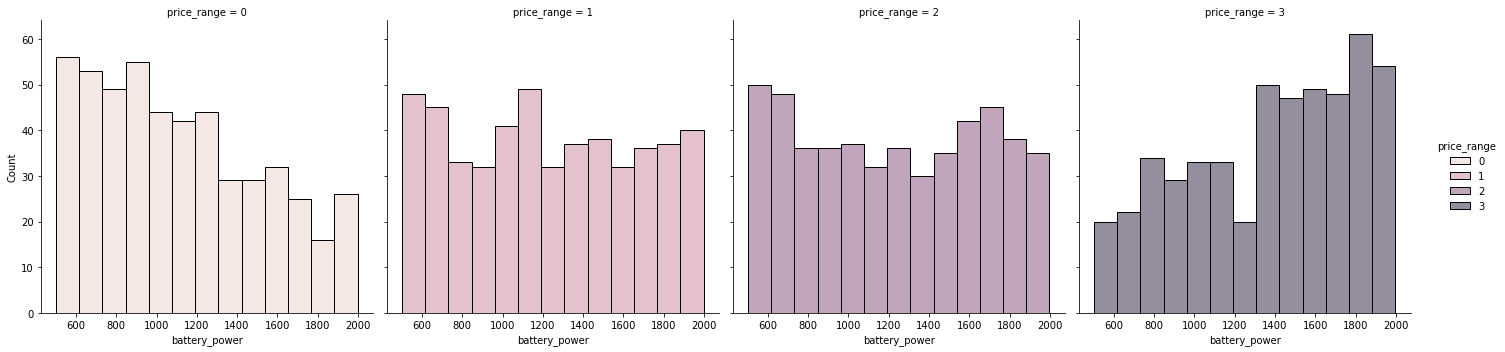

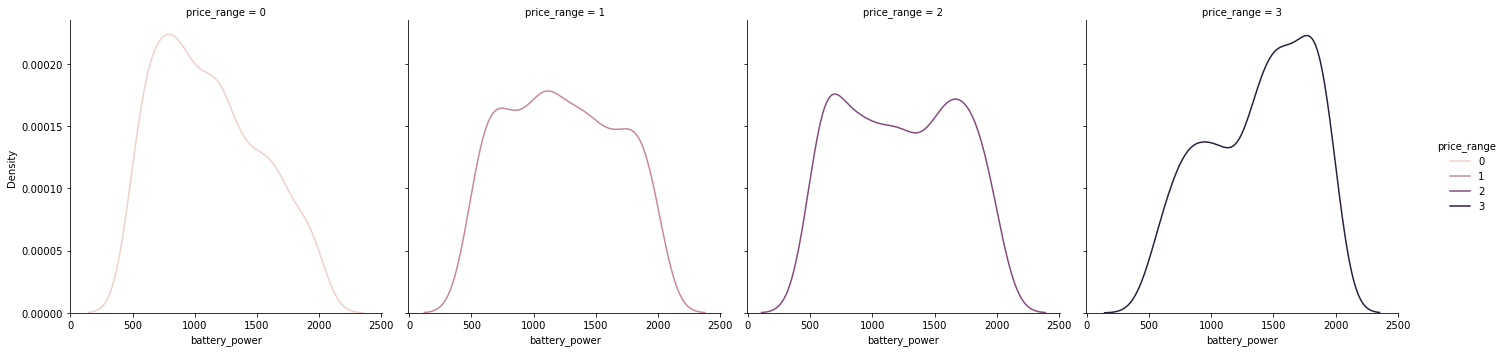

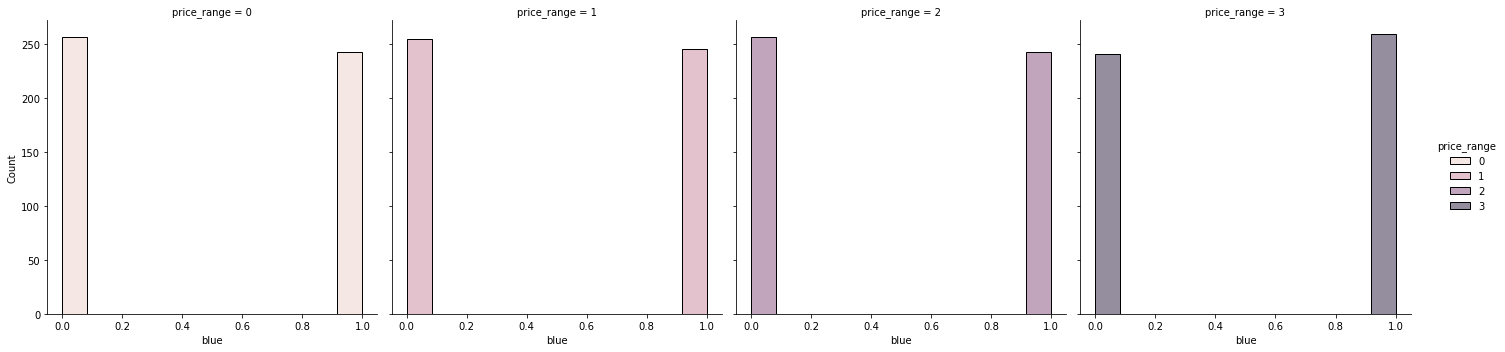

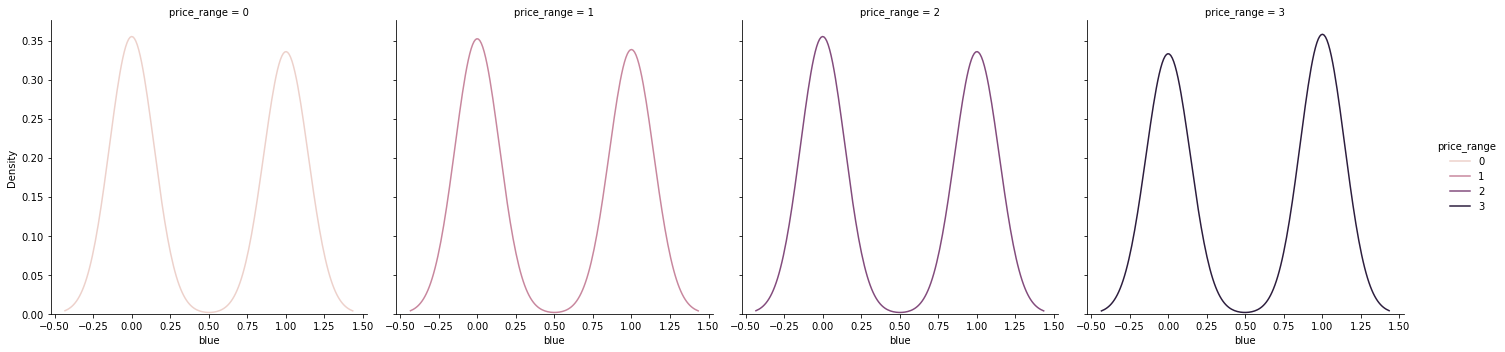

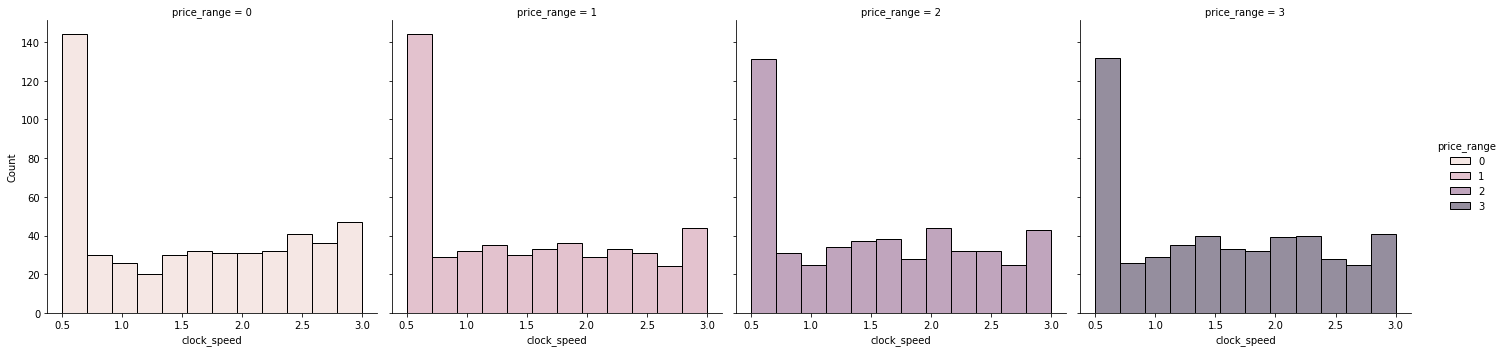

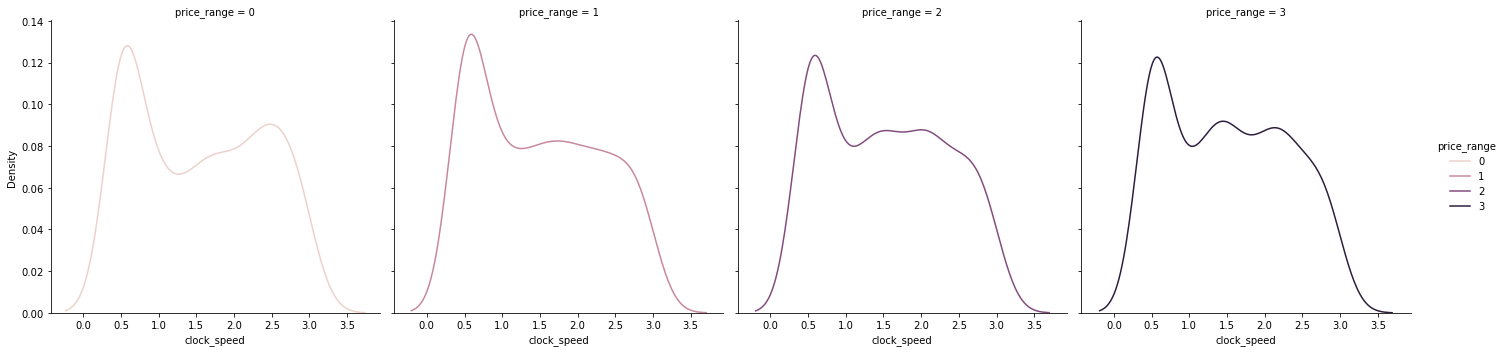

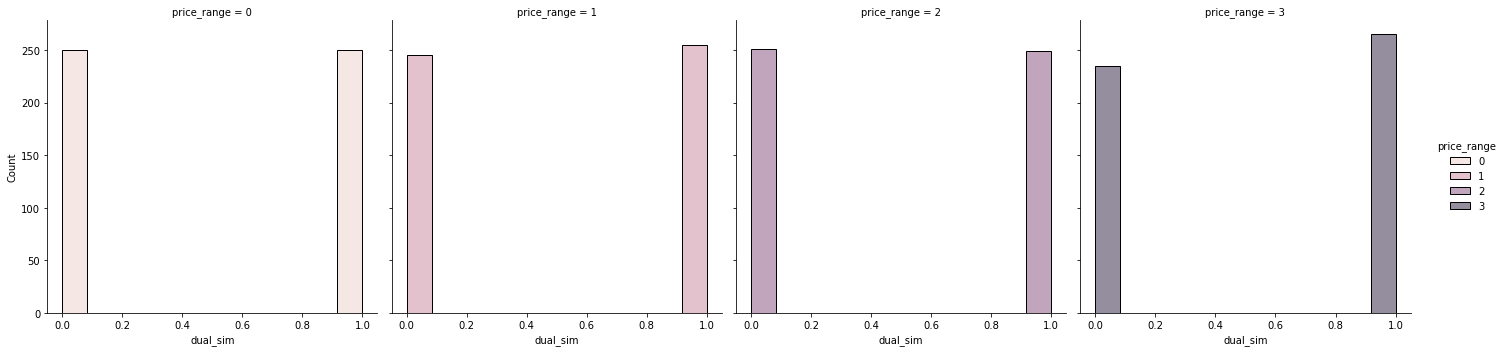

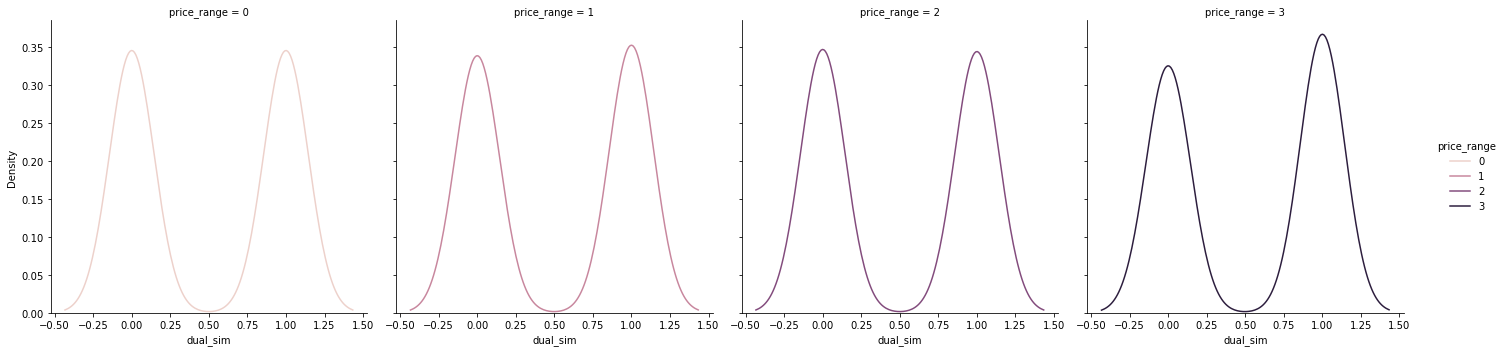

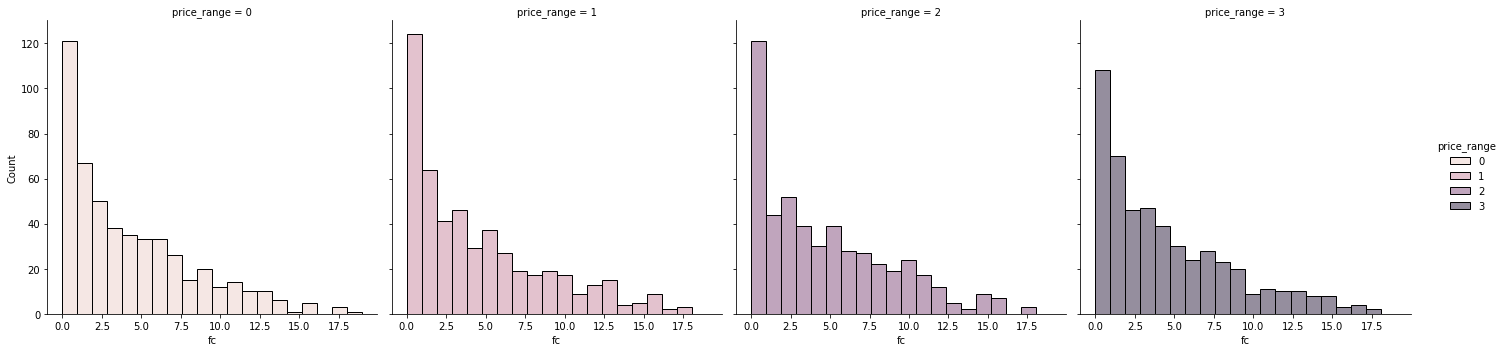

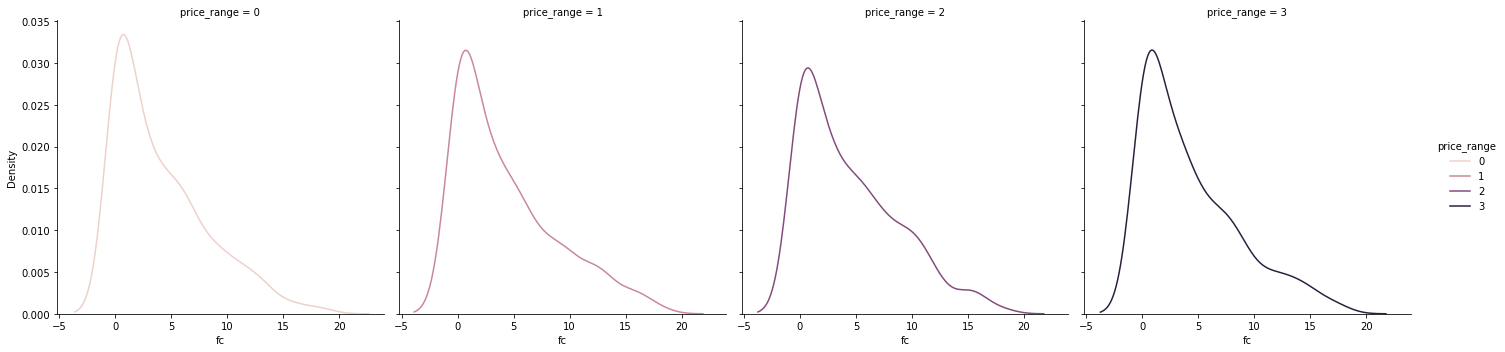

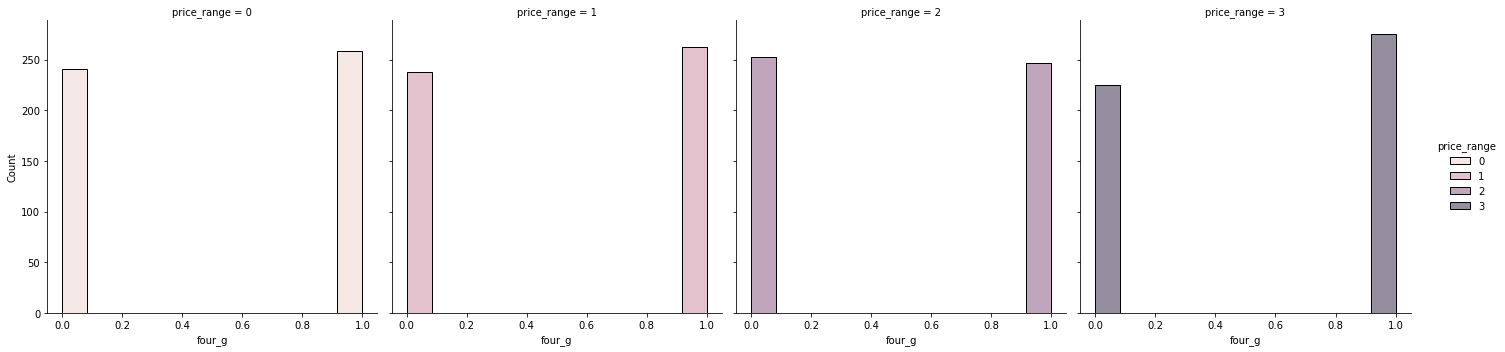

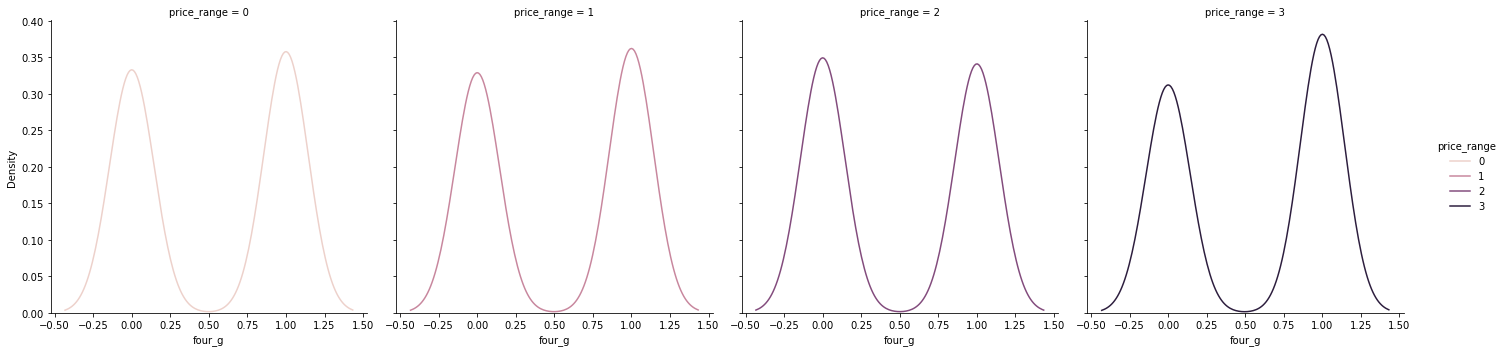

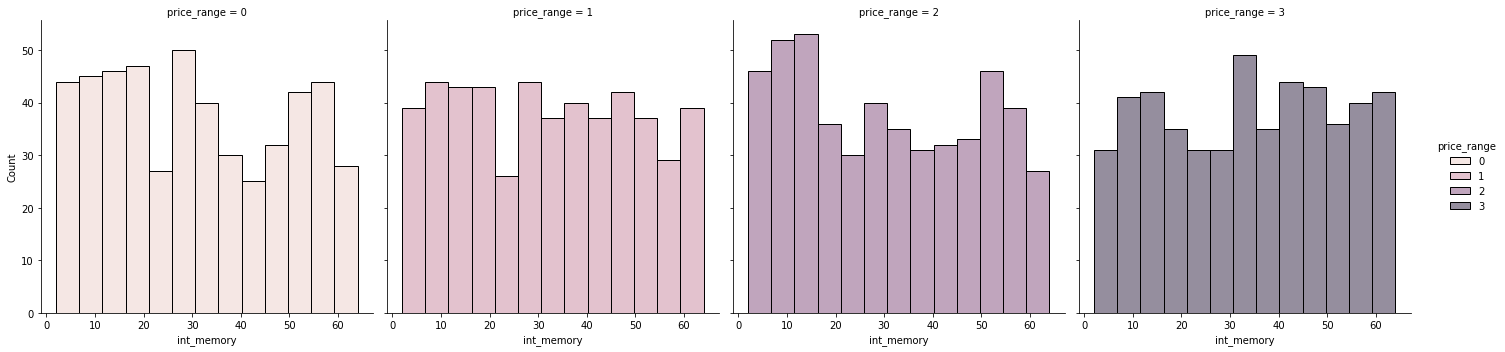

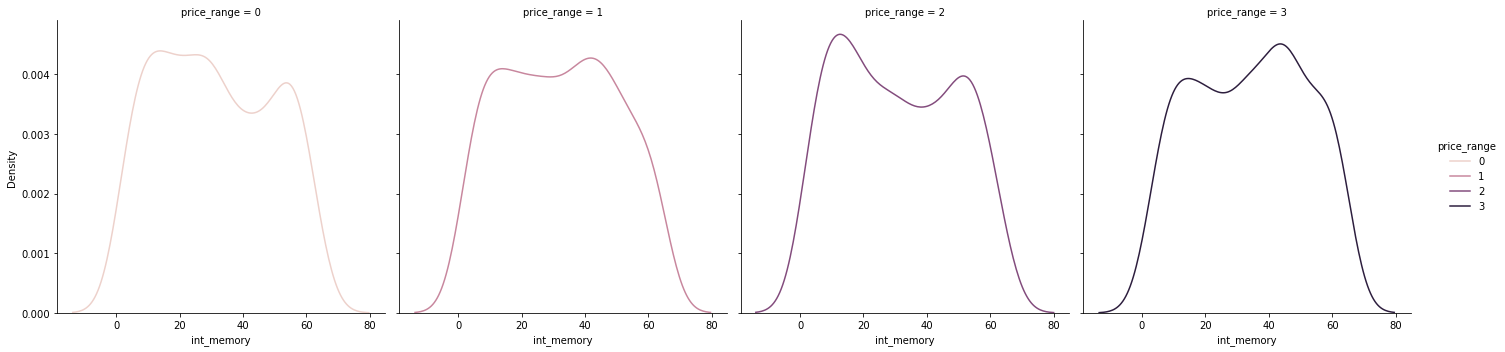

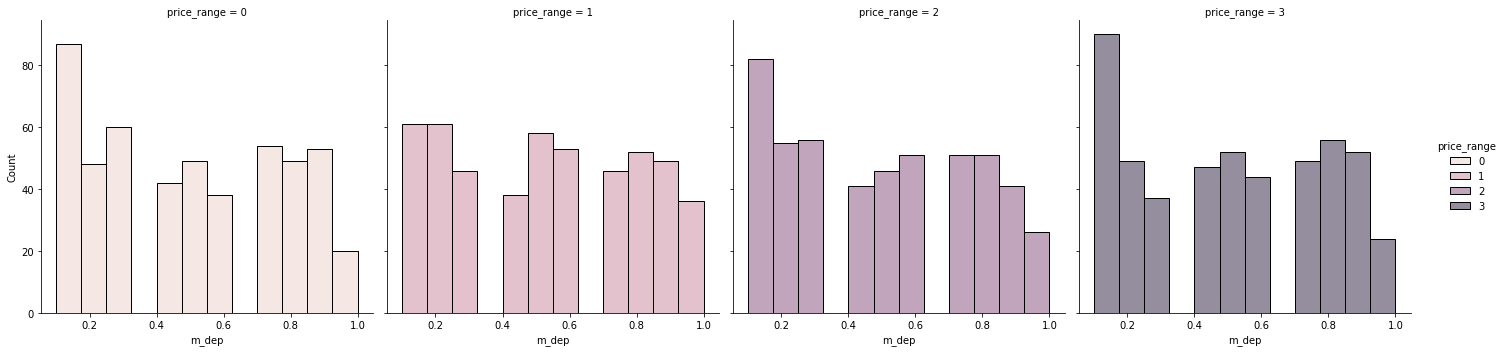

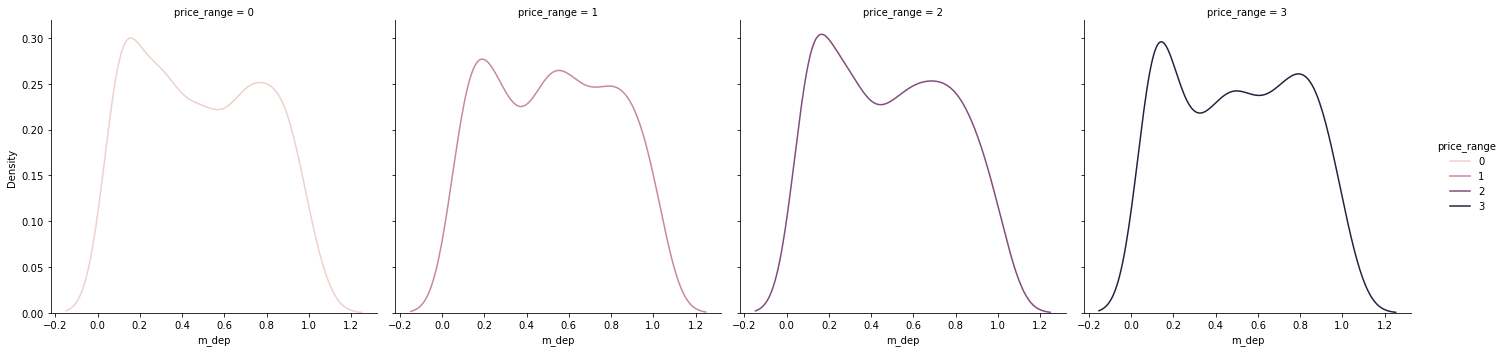

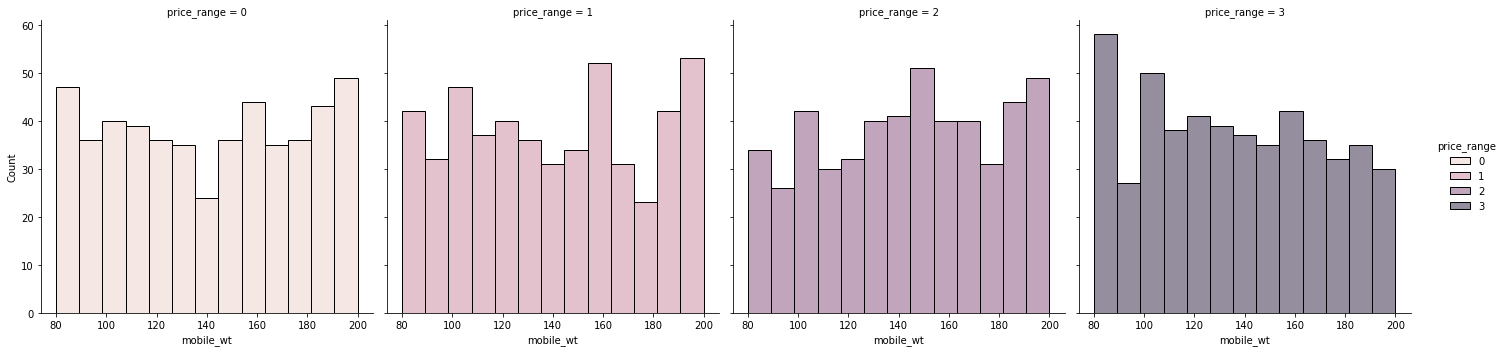

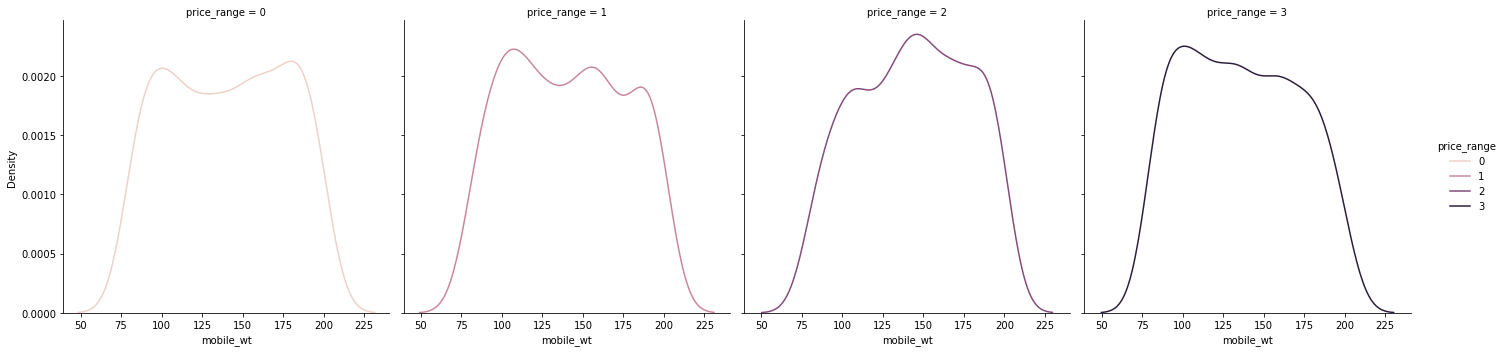

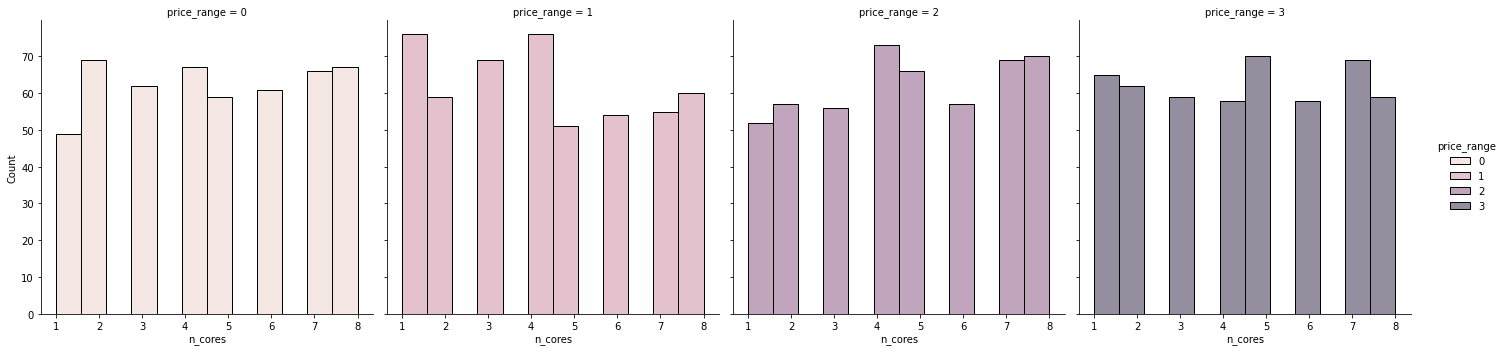

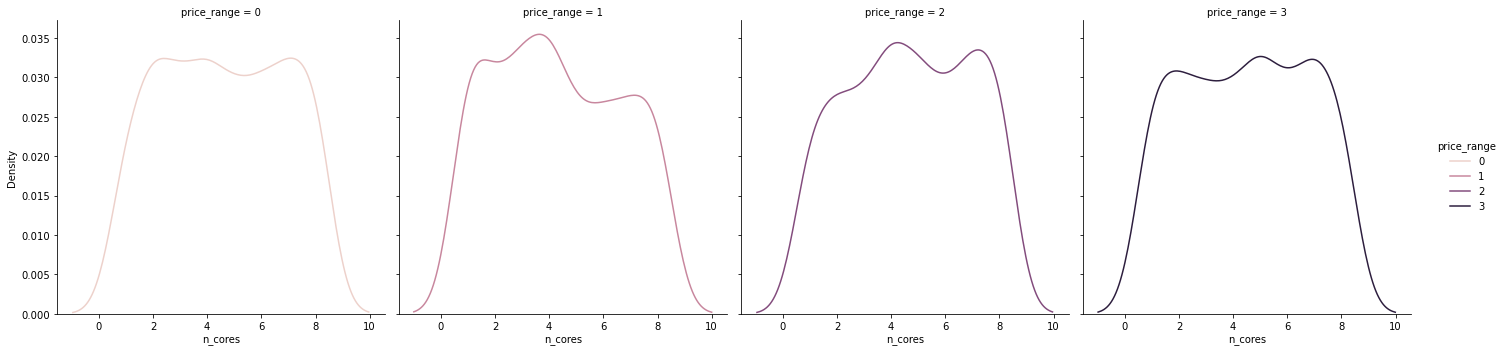

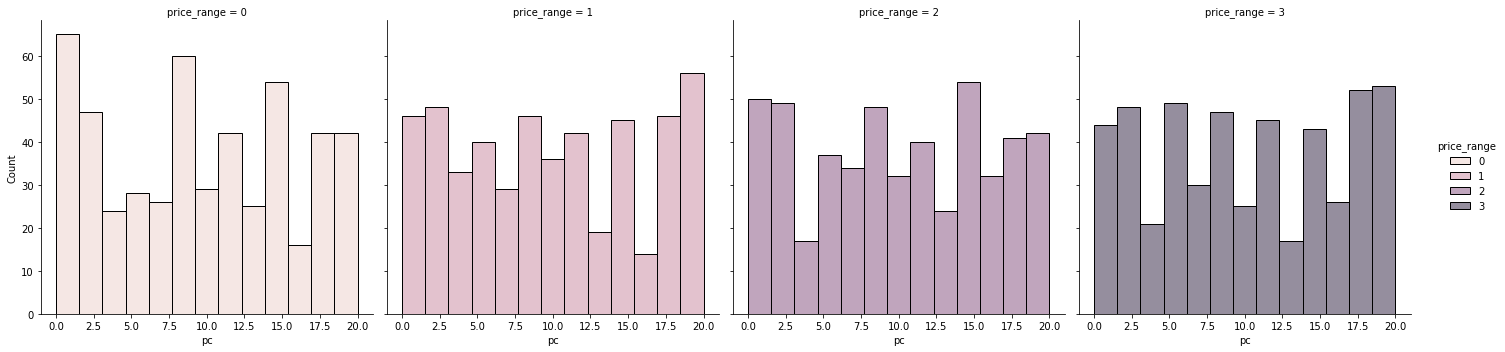

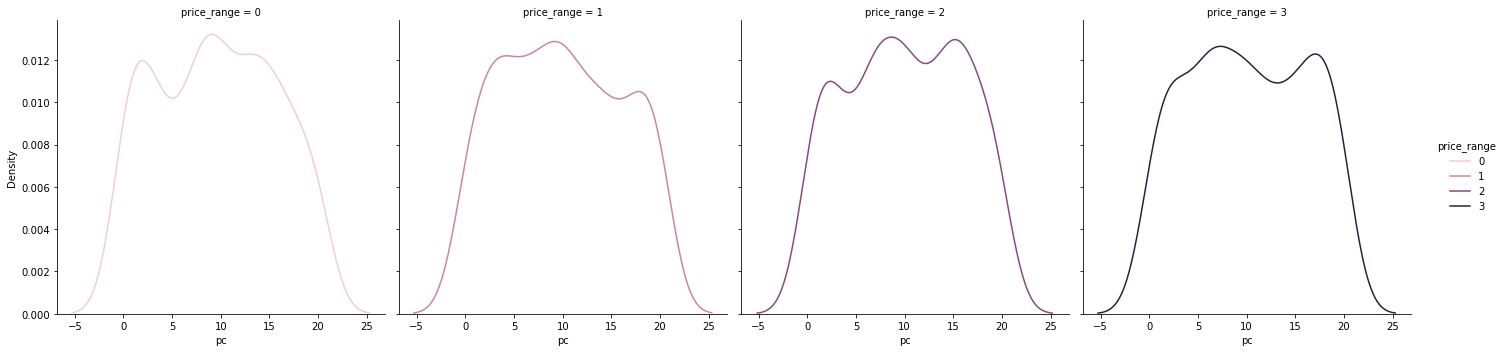

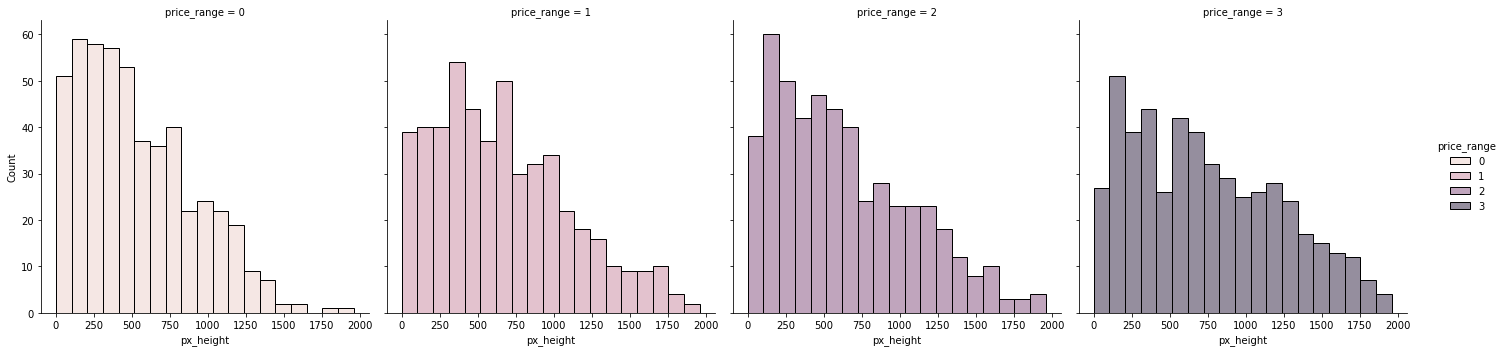

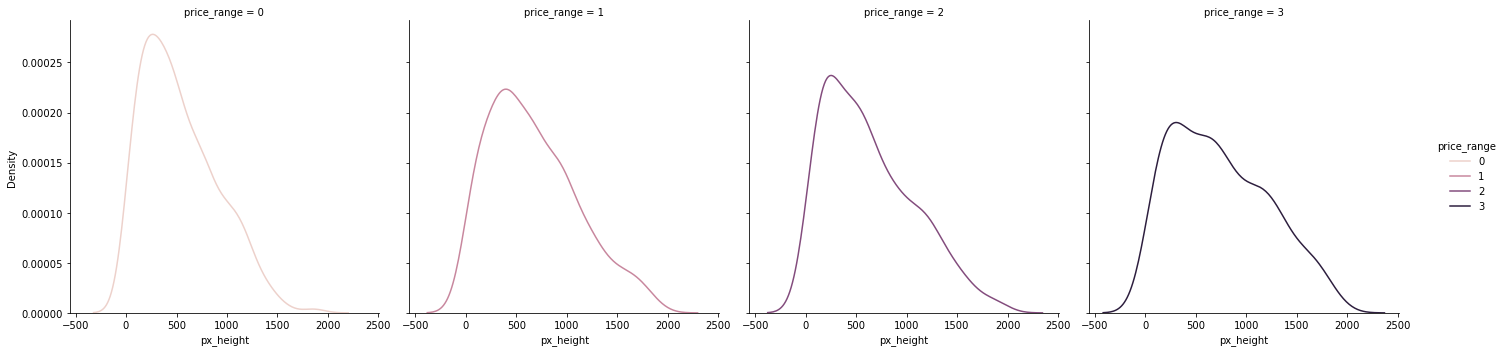

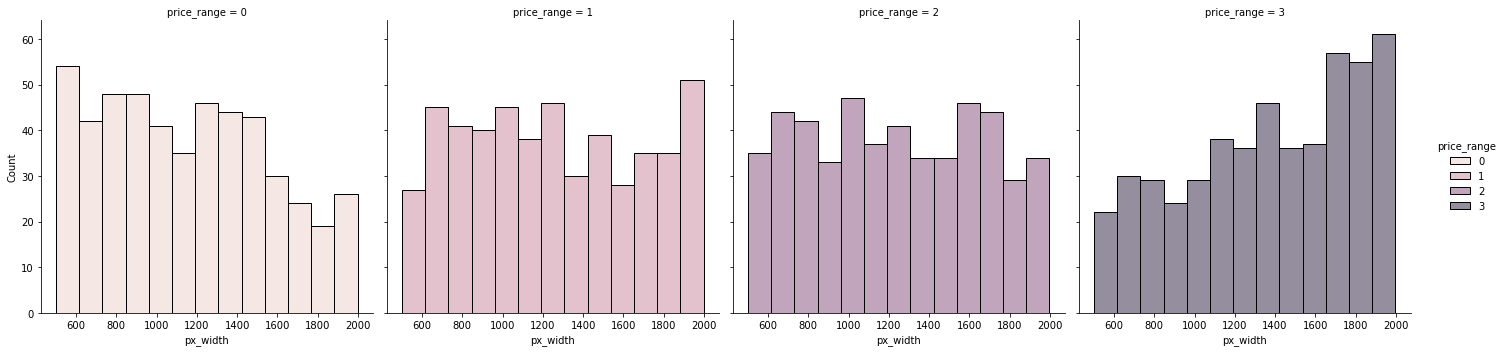

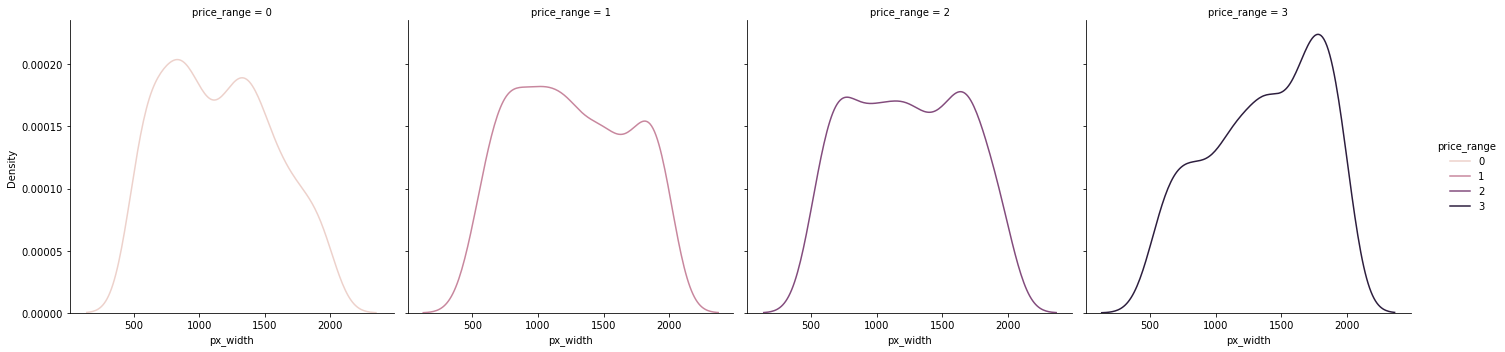

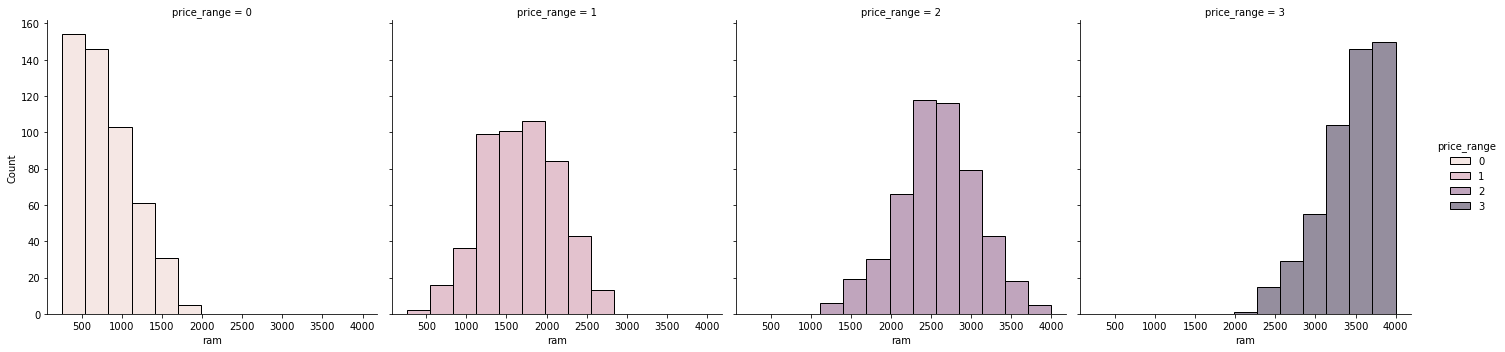

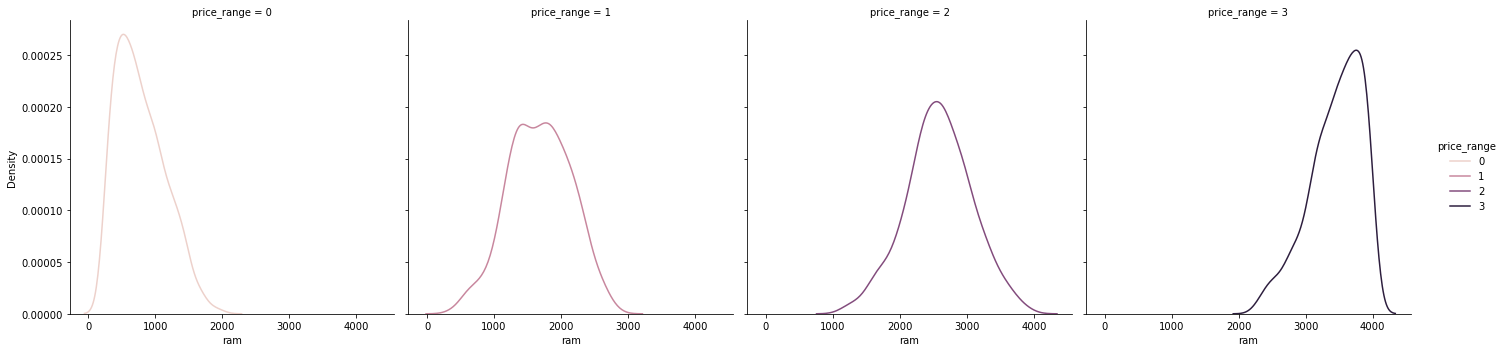

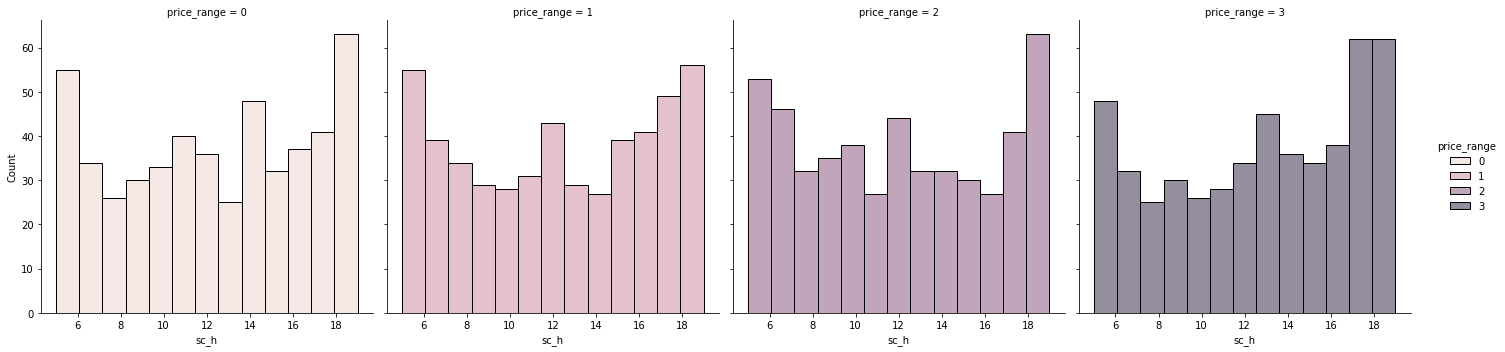

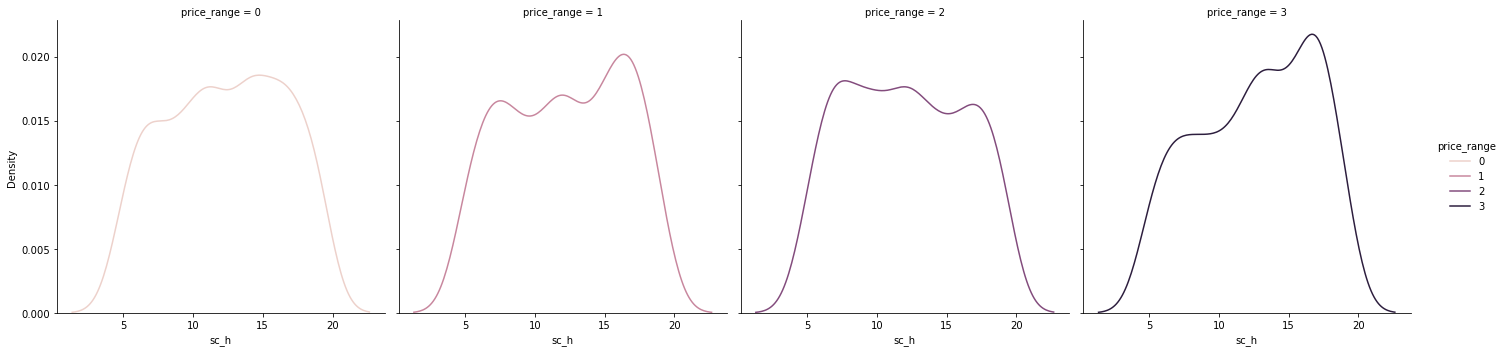

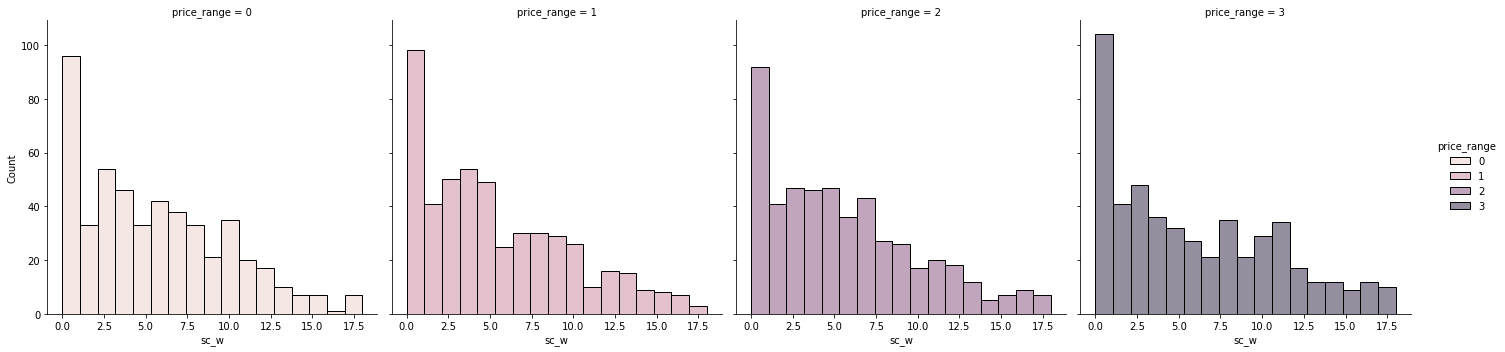

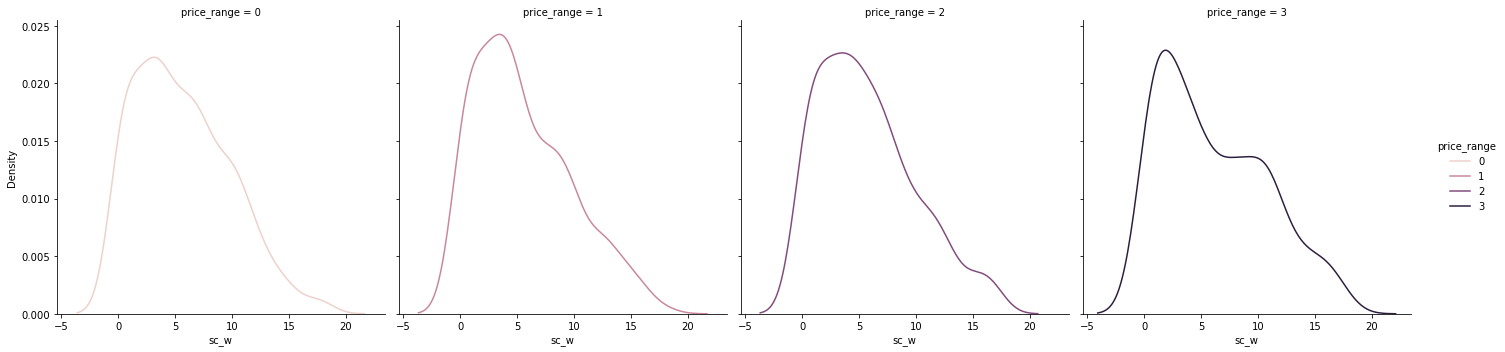

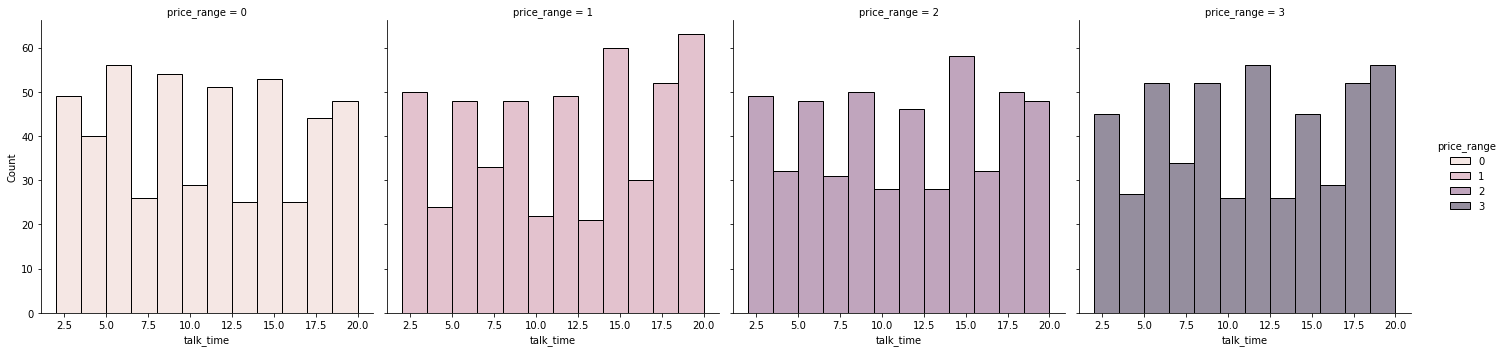

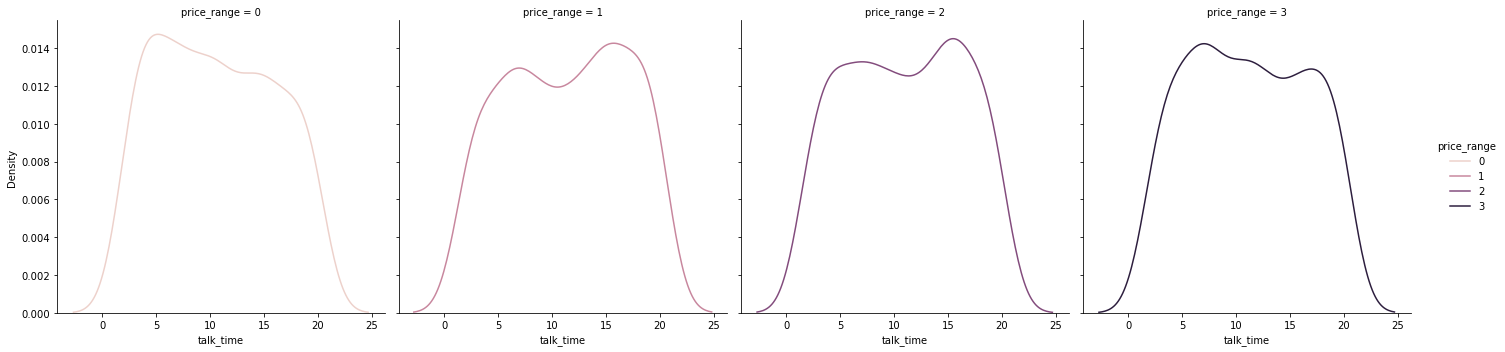

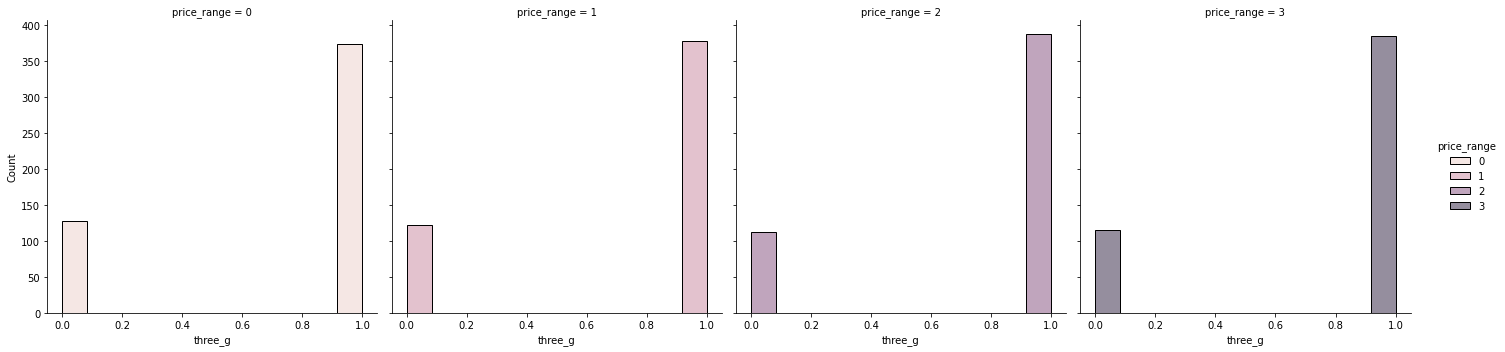

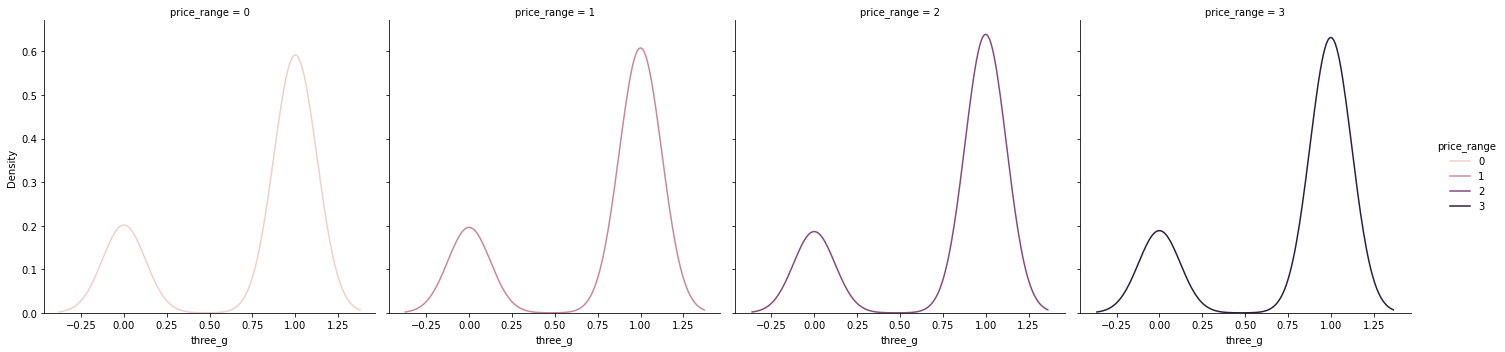

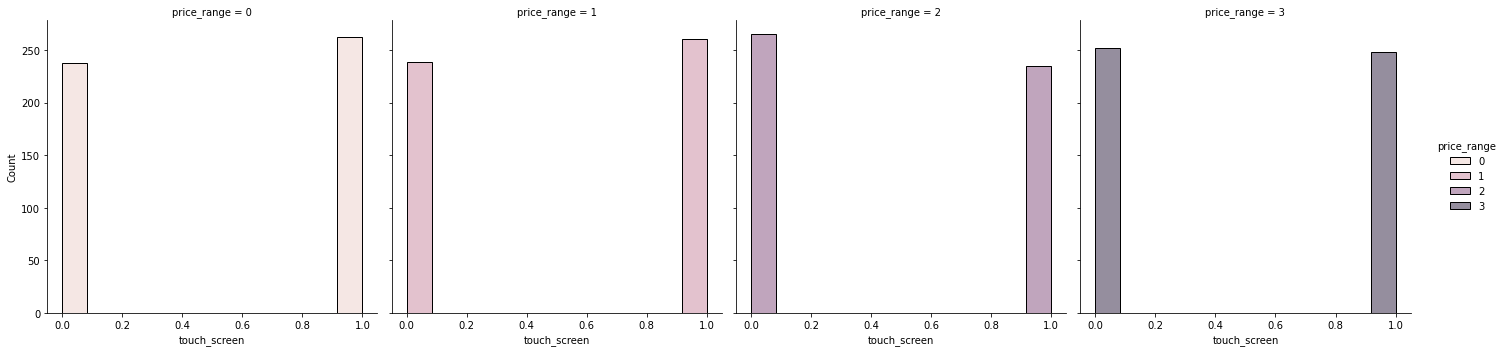

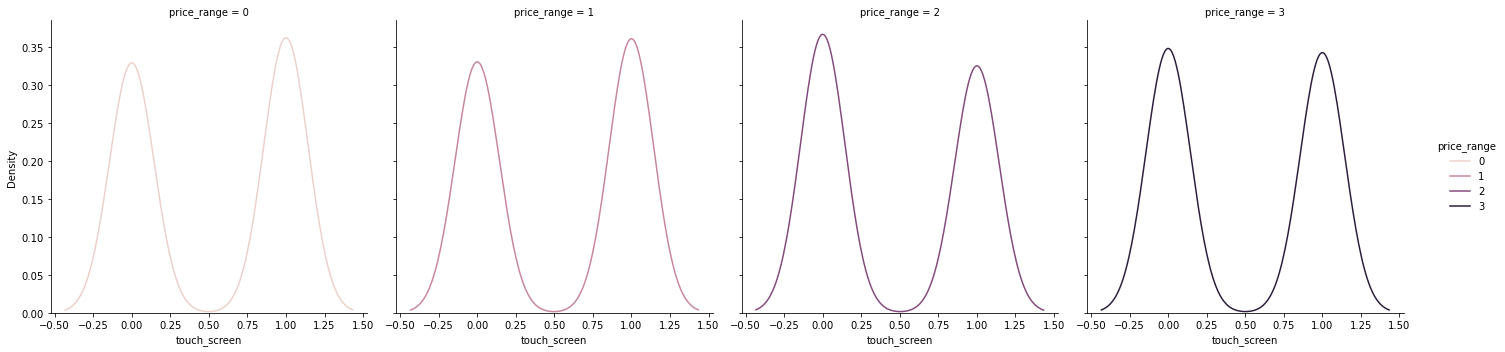

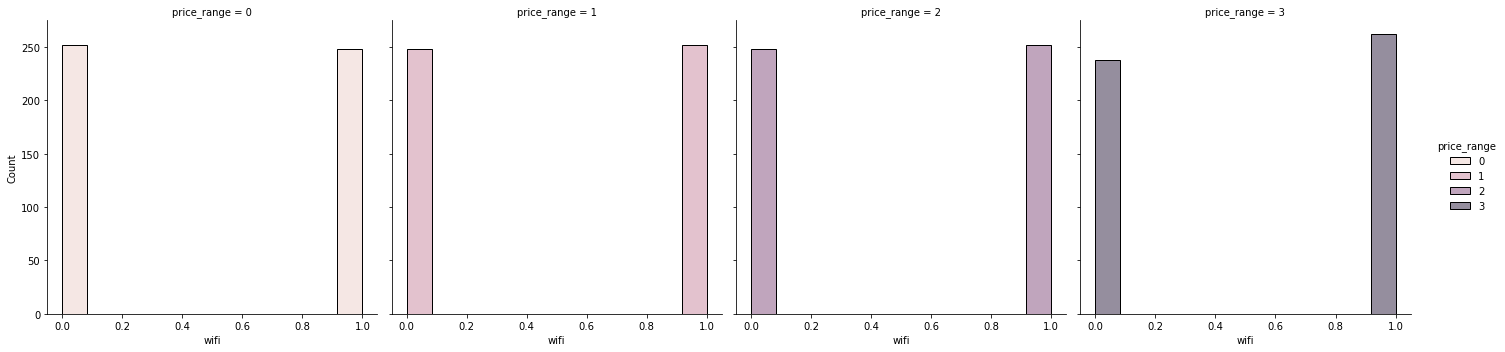

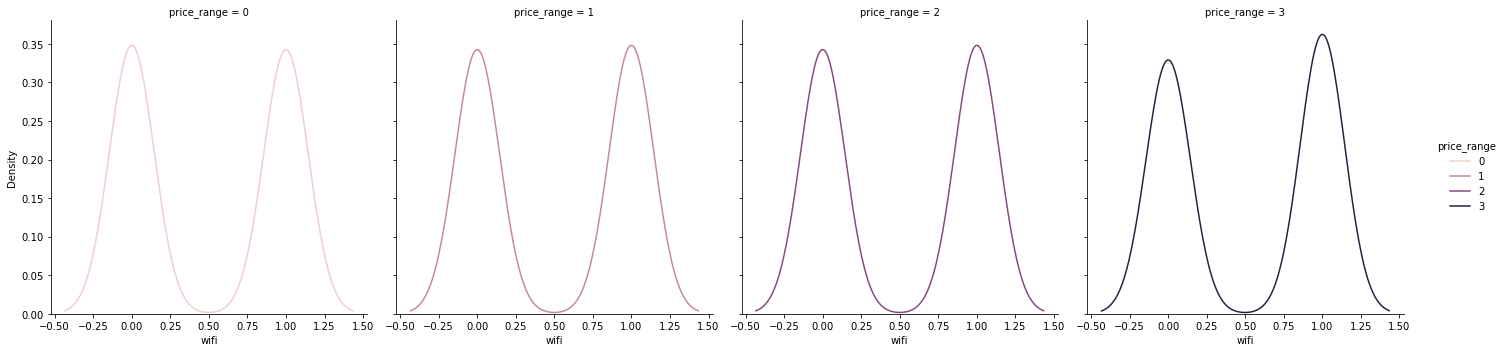

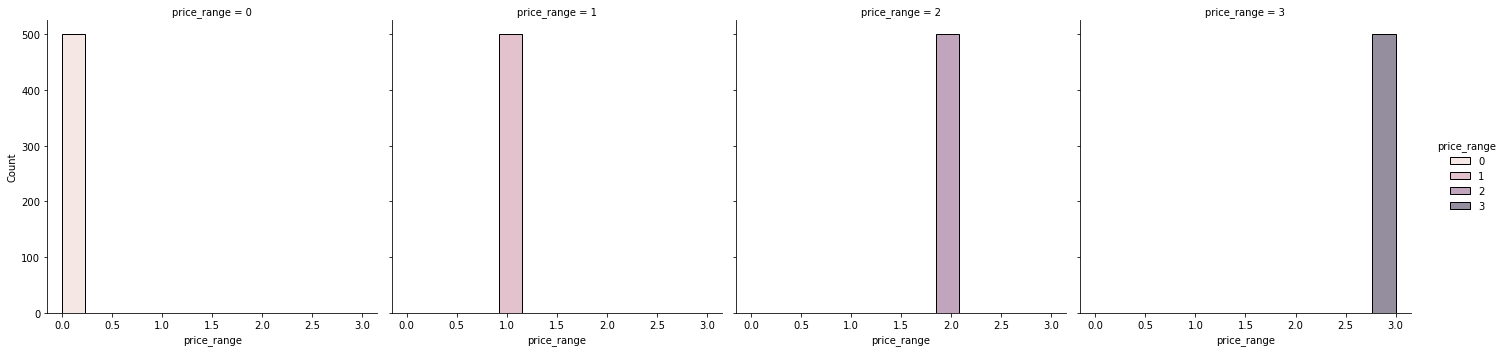

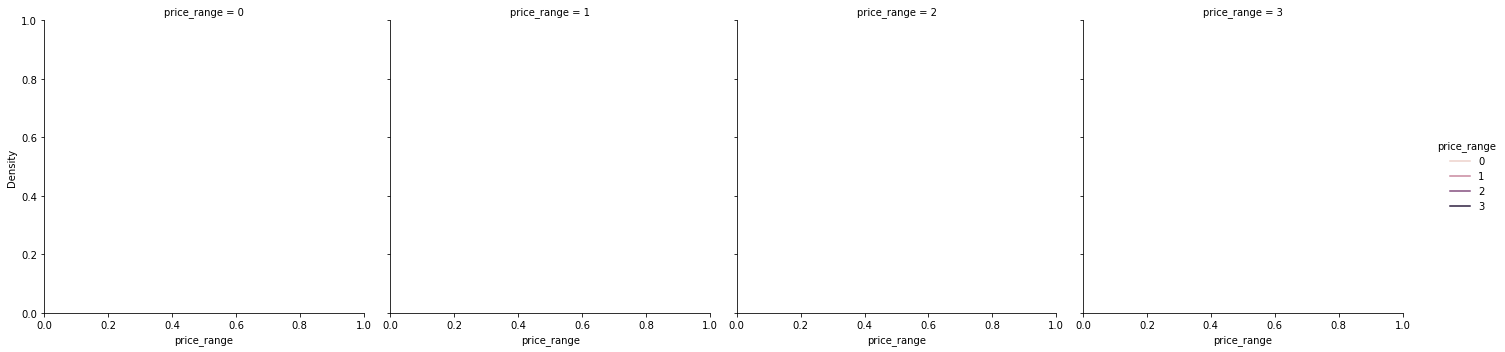

In [6]:
for i in mobile_price.columns: 
    sns.displot(data=mobile_price, x=i, hue='price_range', col='price_range')
    sns.displot(data=mobile_price, kind= "kde", x=i, hue='price_range', col='price_range', rug=False)
    plt.savefig('./histogram_1/price_range_plot_{}.png'.format(i), dpi=300, bbox_inches="tight")

## 1-1. 범주형 변수들과 가격의 상관관계

In [11]:
categorical_col = ['blue','dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

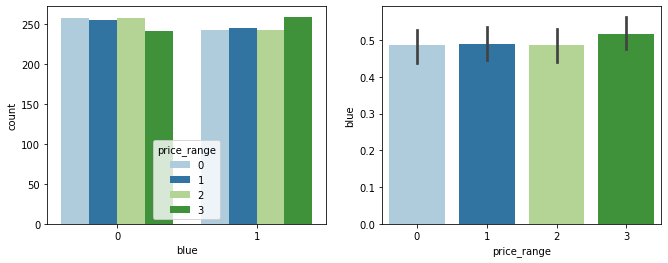

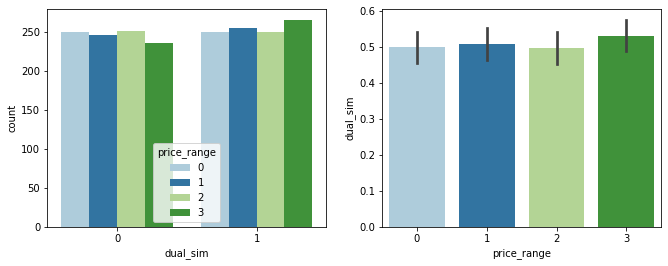

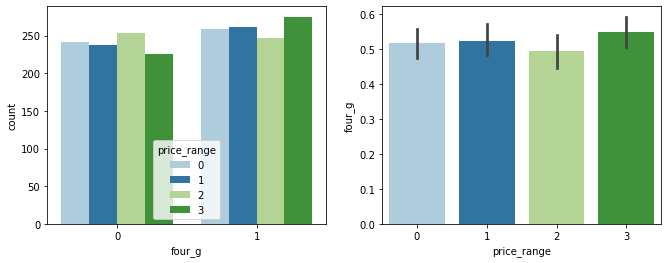

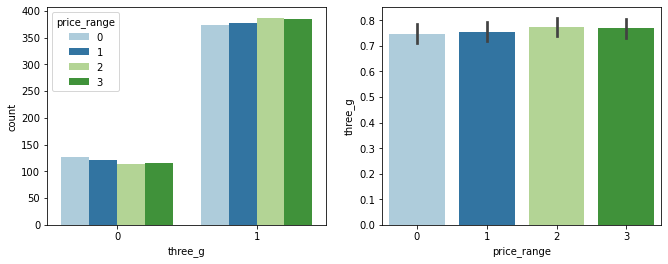

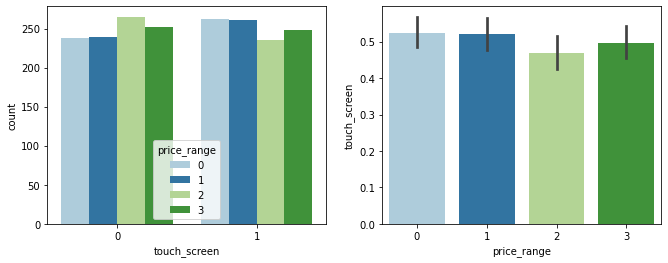

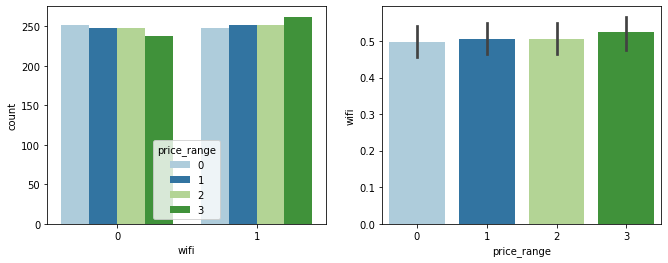

In [18]:
for i in categorical_col:
    plt.figure(figsize=(11, 4))
    plt.subplot(1,2,1)
    sns.countplot(x=i, hue='price_range', data=mobile_price, palette='Paired')

    plt.subplot(1,2,2)
    sns.barplot(x='price_range',y=i,data=mobile_price , palette='Paired')
    plt.savefig('./categorical/plot_{}.png'.format(i), dpi=300, bbox_inches="tight")
    plt.show()

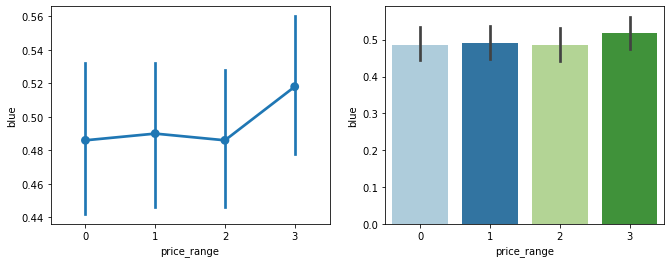

In [7]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='blue' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='blue',data=mobile_price)
plt.savefig('./price_range_plot_blue.png', dpi=300, bbox_inches="tight")
plt.show()

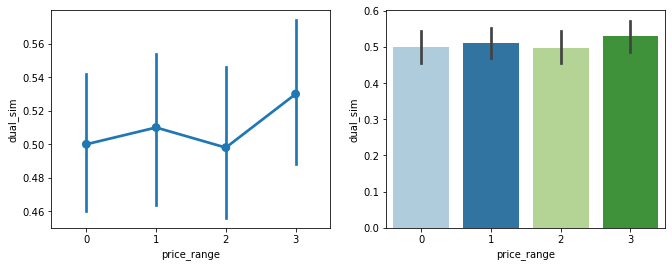

In [8]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='dual_sim' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='dual_sim',data=mobile_price)
plt.savefig('./price_range_plot_dual_sim.png', dpi=300, bbox_inches="tight")
plt.show()

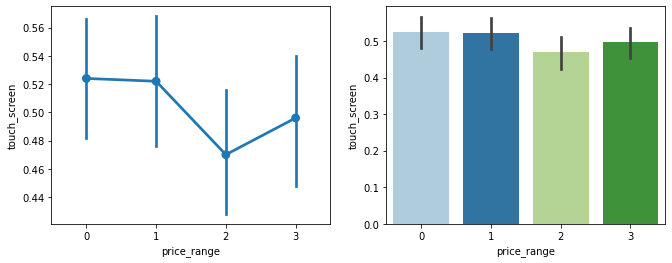

In [9]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='touch_screen' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='touch_screen',data=mobile_price)
plt.savefig('./price_range_plot_touch_screen.png', dpi=300, bbox_inches="tight")
plt.show()

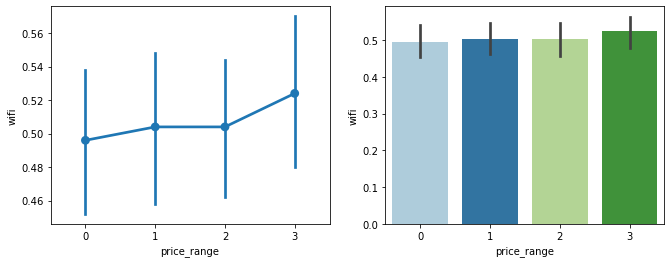

In [10]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='wifi' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='wifi',data=mobile_price)
plt.savefig('./price_range_plot_wifi.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-2. 배터리와 가격의 상관관계

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

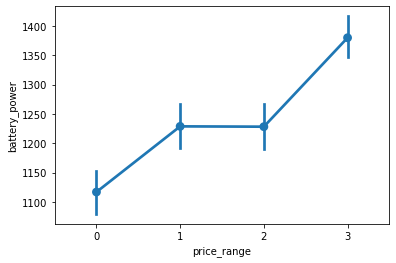

In [21]:
sns.pointplot(x='price_range',y='battery_power',data=mobile_price)

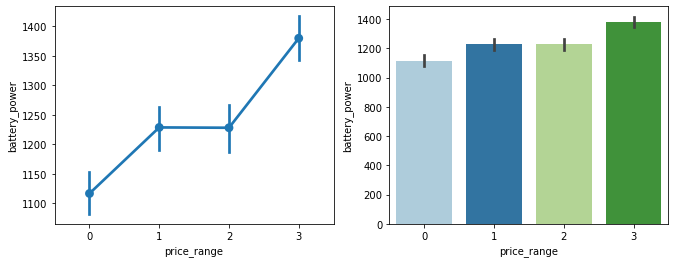

In [35]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='battery_power' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='battery_power',data=mobile_price)
plt.savefig('./price_range_plot_bettery_power.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-3. 클럭 속도와 가격의 상관관계

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

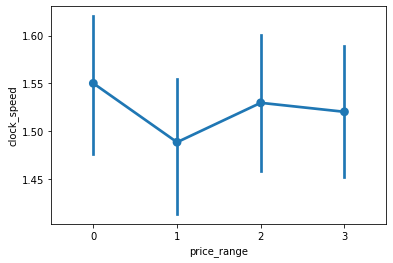

In [36]:
sns.pointplot(x='price_range', y='clock_speed', data=mobile_price)

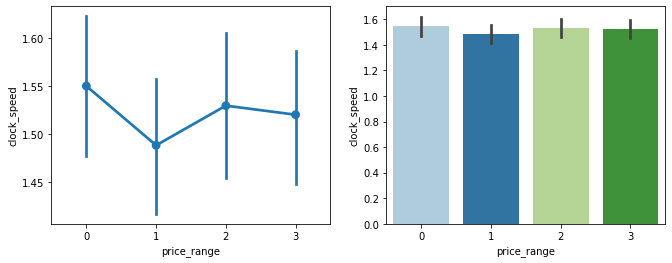

In [36]:
# fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='clock_speed' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range', y='clock_speed', data=mobile_price)
plt.savefig('./price_range_plot_colck_speed.png', dpi=300, bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='clock_speed', ylabel='Density'>

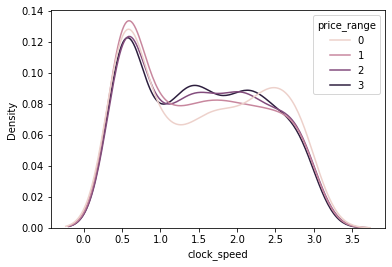

In [32]:
sns.kdeplot(data=mobile_price, x='clock_speed', hue='price_range')

## 1-4. 전면 카메라, 후면 카메라와 가격의 상관관계

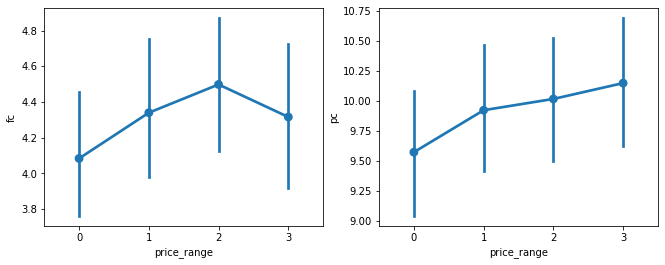

In [37]:
# sns.pointplot(x='price_range',y='int_memory',data=mobile_price)
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='fc',data=mobile_price)

plt.subplot(1,2,2)
sns.pointplot(x='price_range',y='pc',data=mobile_price)
plt.savefig('./price_range_plot_fc_pc_1.png', dpi=300, bbox_inches="tight")
plt.show()

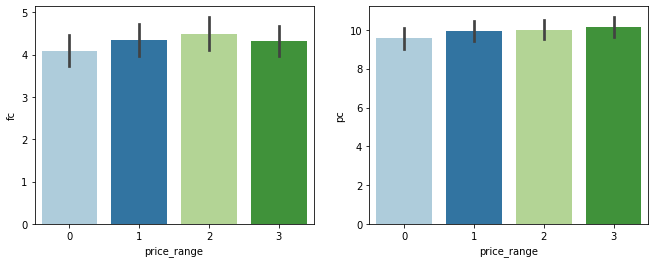

In [38]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='fc',data=mobile_price ,palette='Paired')

plt.subplot(1,2,2)
sns.barplot(x='price_range',y='pc',data=mobile_price ,palette='Paired')
plt.savefig('./price_range_plot_fc_pc_2.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-5. 내장 메모리와 가격의 상관관계

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

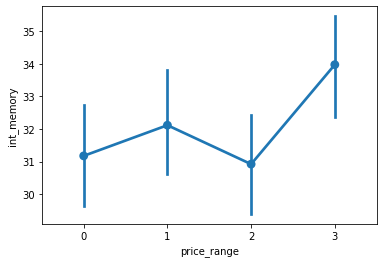

In [24]:
sns.pointplot(x='price_range',y='int_memory',data=mobile_price)

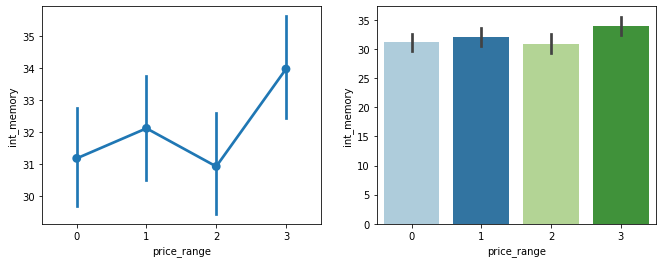

In [39]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='int_memory' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='int_memory',data=mobile_price)
plt.savefig('./price_range_plot_int_memory.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-6. 휴대폰 두께, 무게와 가격의 상관관계

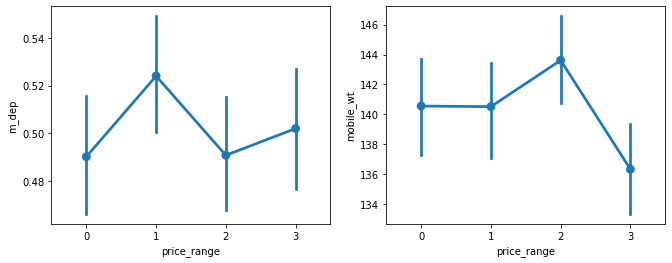

In [57]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='m_dep',data=mobile_price)

plt.subplot(1,2,2)
sns.pointplot(x='price_range',y='mobile_wt',data=mobile_price)
plt.savefig('./price_range_m_dep_mobile_wt_1.png', dpi=300, bbox_inches="tight")
plt.show()

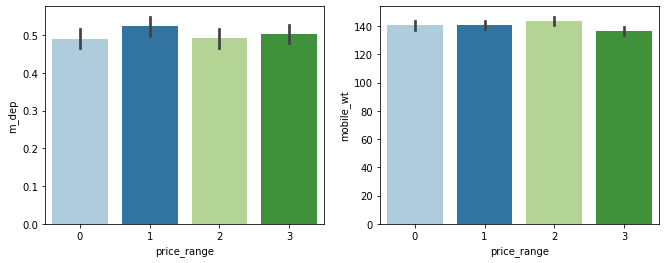

In [41]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='m_dep',data=mobile_price ,palette='Paired')

plt.subplot(1,2,2)
sns.barplot(x='price_range',y='mobile_wt',data=mobile_price ,palette='Paired')
plt.savefig('./price_range_plot_m_dep_mobile_wt_2.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-7. 코어의 개수와 가격의 상관관계

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

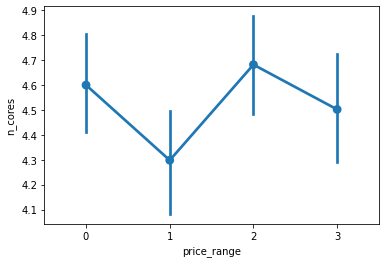

In [59]:
sns.pointplot(y='n_cores',x='price_range',data=mobile_price)

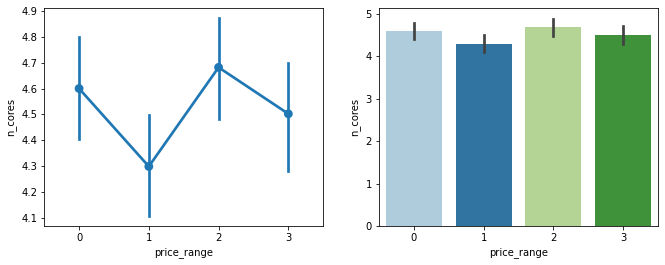

In [42]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='n_cores' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(y='n_cores',x='price_range',data=mobile_price)
plt.savefig('./price_range_plot_n_cores.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-8. 픽셀 해상도와 가격의 상관관계

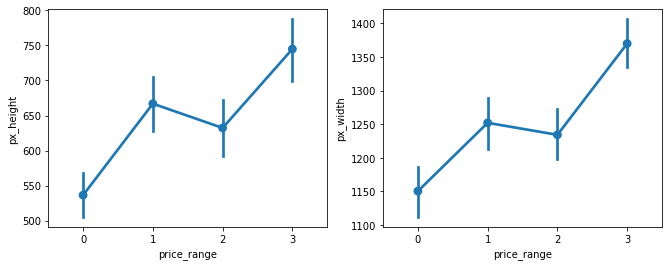

In [44]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='px_height',data=mobile_price)

plt.subplot(1,2,2)
sns.pointplot(x='price_range',y='px_width',data=mobile_price)
plt.savefig('./price_range_plot_px_1.png', dpi=300, bbox_inches="tight")
plt.show()

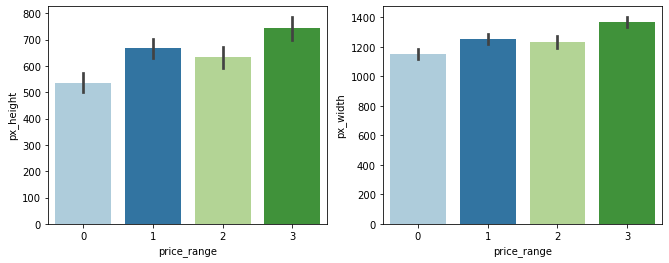

In [43]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=mobile_price ,palette='Paired')

plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=mobile_price ,palette='Paired')
plt.savefig('./price_range_plot_px_2.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-9. 램과 가격의 상관관계

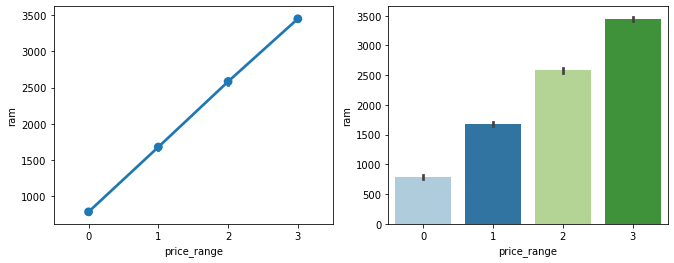

In [3]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='ram' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='ram',data=mobile_price)
plt.savefig('./price_range_plot_ram_4.png', dpi=300, bbox_inches="tight")
plt.show()

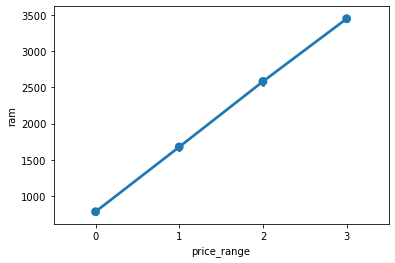

In [48]:
sns.pointplot(y='ram',x='price_range',data=mobile_price)
plt.savefig('./price_range_plot_ram_1.png', dpi=300, bbox_inches="tight")

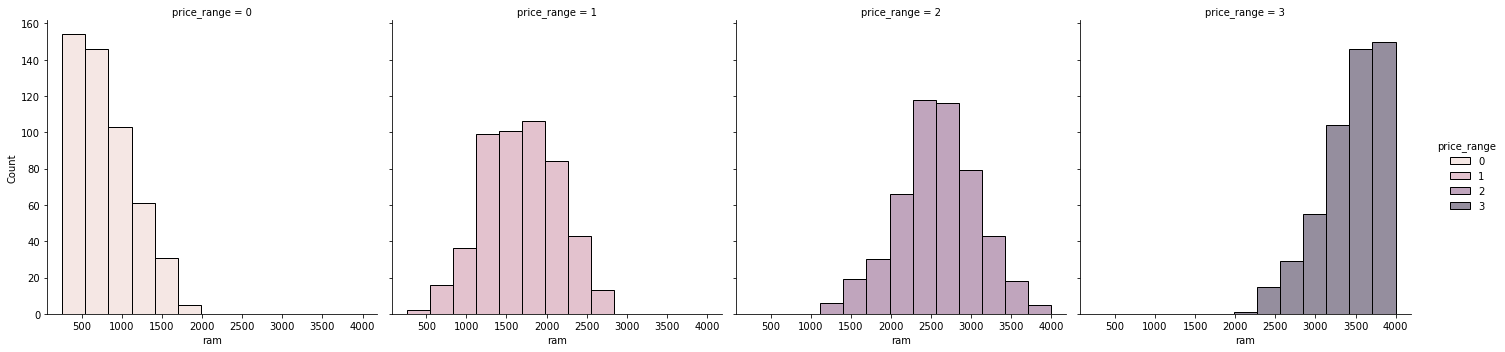

In [50]:
sns.displot(data=mobile_price, x="ram", hue="price_range", col="price_range")
plt.savefig('./price_range_plot_ram_2.png', dpi=300, bbox_inches="tight")
plt.show()

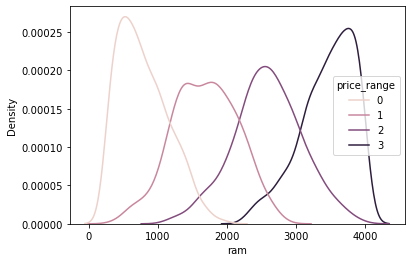

In [49]:
sns.kdeplot(data=mobile_price, x='ram', hue='price_range')
plt.savefig('./price_range_plot_ram_3.png', dpi=300, bbox_inches="tight")

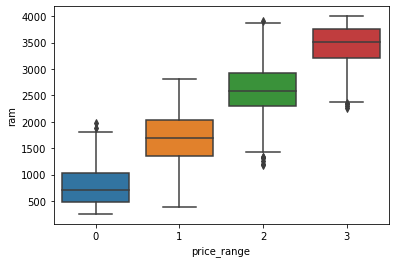

In [19]:
sns.boxplot(x='price_range',y='ram',data=mobile_price)
plt.show()

## 1-10. 화면 크기와 가격의 상관관계

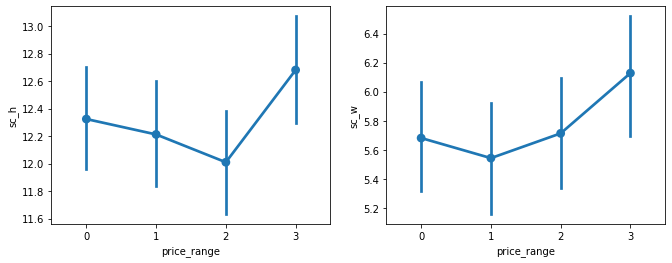

In [51]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.pointplot(x='price_range',y='sc_h',data=mobile_price)

plt.subplot(1,2,2)
sns.pointplot(x='price_range',y='sc_w',data=mobile_price)
plt.savefig('./price_range_plot_sc_1.png', dpi=300, bbox_inches="tight")
plt.show()

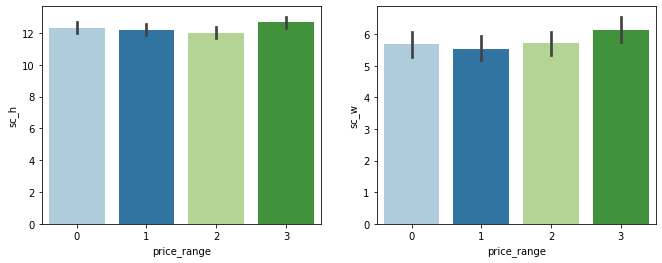

In [52]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='sc_h',data=mobile_price ,palette='Paired')

plt.subplot(1,2,2)
sns.barplot(x='price_range',y='sc_w',data=mobile_price ,palette='Paired')
plt.savefig('./price_range_plot_sc_2.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-11. 배터리 시간과 가격의 상관관계

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

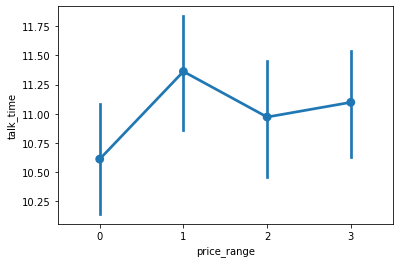

In [64]:
sns.pointplot(x='price_range', y='talk_time', data=mobile_price)

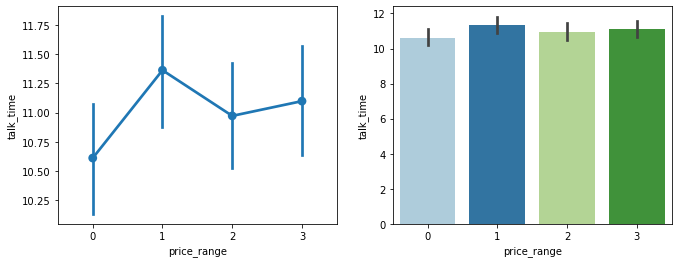

In [53]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='talk_time' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range', y='talk_time', data=mobile_price)
plt.savefig('./price_range_plot_talk_time.png', dpi=300, bbox_inches="tight")
plt.show()

## 1-12. 4G와 3G

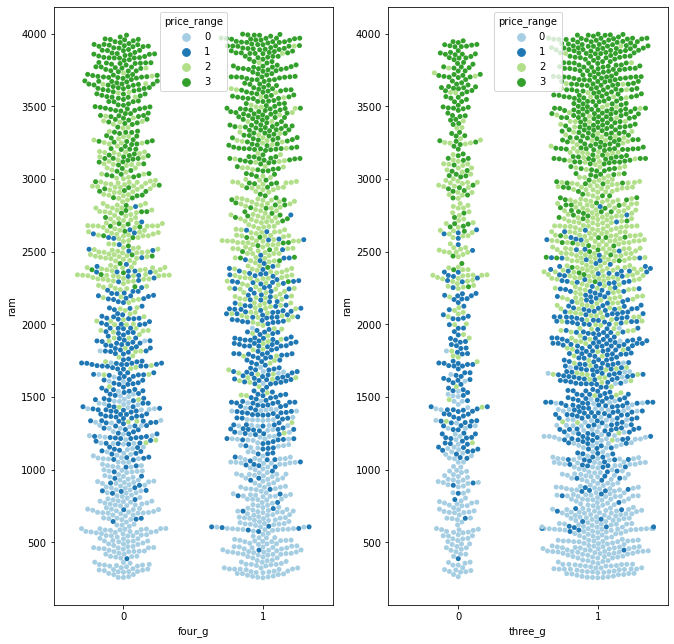

In [32]:
plt.figure(figsize=(11, 11))
plt.subplot(1,2,1)
sns.swarmplot(x='four_g', y='ram', hue='price_range', palette='Paired', data=mobile_price)

plt.subplot(1,2,2)
sns.swarmplot(x='three_g', y='ram', hue='price_range', palette='Paired', data=mobile_price)
plt.savefig('./price_range_plot_4g_3g-1.png', dpi=300, bbox_inches="tight")

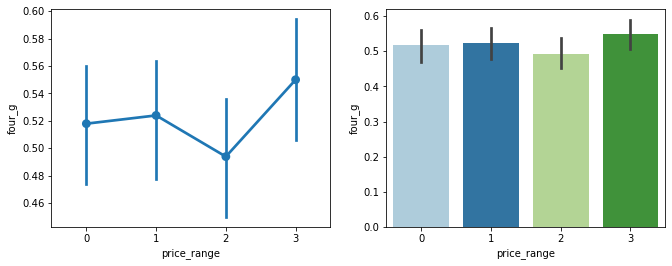

In [55]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='four_g' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range', y='four_g', data=mobile_price)
plt.savefig('./price_range_plot_four_g.png', dpi=300, bbox_inches="tight")
plt.show()

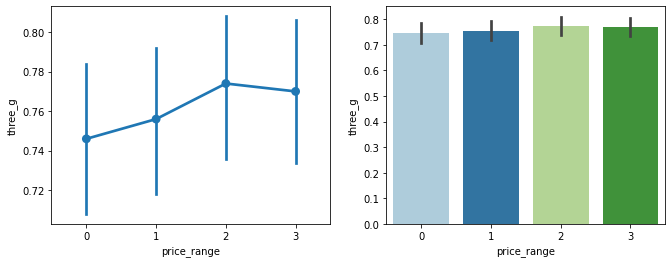

In [56]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='three_g' ,data=mobile_price, palette='Paired')

plt.subplot(1,2,1)
sns.pointplot(x='price_range', y='three_g', data=mobile_price)
plt.savefig('./price_range_plot_three_g.png', dpi=300, bbox_inches="tight")
plt.show()

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


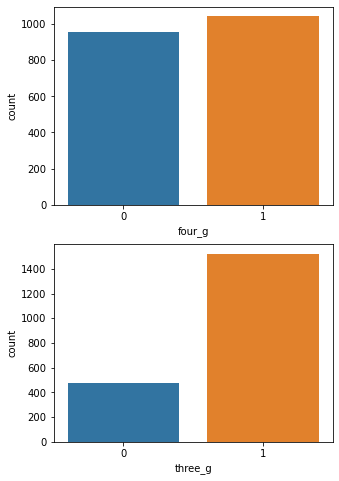

In [80]:
# plt.figure(figsize=(11, 4))
f, ax = plt.subplots(2,1,figsize=(5,8))
# plt.subplot(2,1,1)
sns.countplot(mobile_price['four_g'], ax=ax[0])

# plt.subplot(2,1,2)
sns.countplot(mobile_price['three_g'], ax=ax[1])
plt.savefig('./price_range_plot_4g_3g_2.png', dpi=300, bbox_inches="tight")
plt.show()

# 2. Coverage-Homogeneity plot

In [12]:
def _coverage(subset,n):
    return subset.shape[0]/n
def _homogeneity(y):
    _, counts = np.unique(y, return_counts=True)
    ps = counts / len(y)
    return max(ps)
def coverHomo(dataset, target_name, col, operator):         
    coverage = []
    homogeneity = []
    unique_values = np.unique(dataset[col])
    ops = {"<=": (lambda x,y: x<=y), ">=": (lambda x,y: x>=y)}
    for cut_point in unique_values:
        subset = dataset[ops[operator] (dataset[col],cut_point)]
        coverage.append(_coverage(subset[target_name], dataset.shape[0]))
        homogeneity.append(_homogeneity(subset[target_name]))
    return coverage, homogeneity, unique_values

In [ ]:
def WeightedAccuracy()

In [13]:
num_col = []
for i in mobile_price.columns:
    num_col.append(i)
    
target_name = 'price_range'


In [14]:
num_col = mobile_price.drop(columns=target_name).select_dtypes(include=['number']).columns.tolist()
print('numeric:',num_col)
cat_col = mobile_price.drop(columns=target_name).select_dtypes(include=['object']).columns.tolist()
print('categorical:',cat_col)

numeric: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
categorical: []


In [106]:

t = list(range(1,10))
r = list(range(1,2))
t_ = np.array(t)
r_ = np.array(r)
print(t)
print(r)
print(t_ - r_)
print(pr)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1]
[0 1 2 3 4 5 6 7 8]
[0.25]


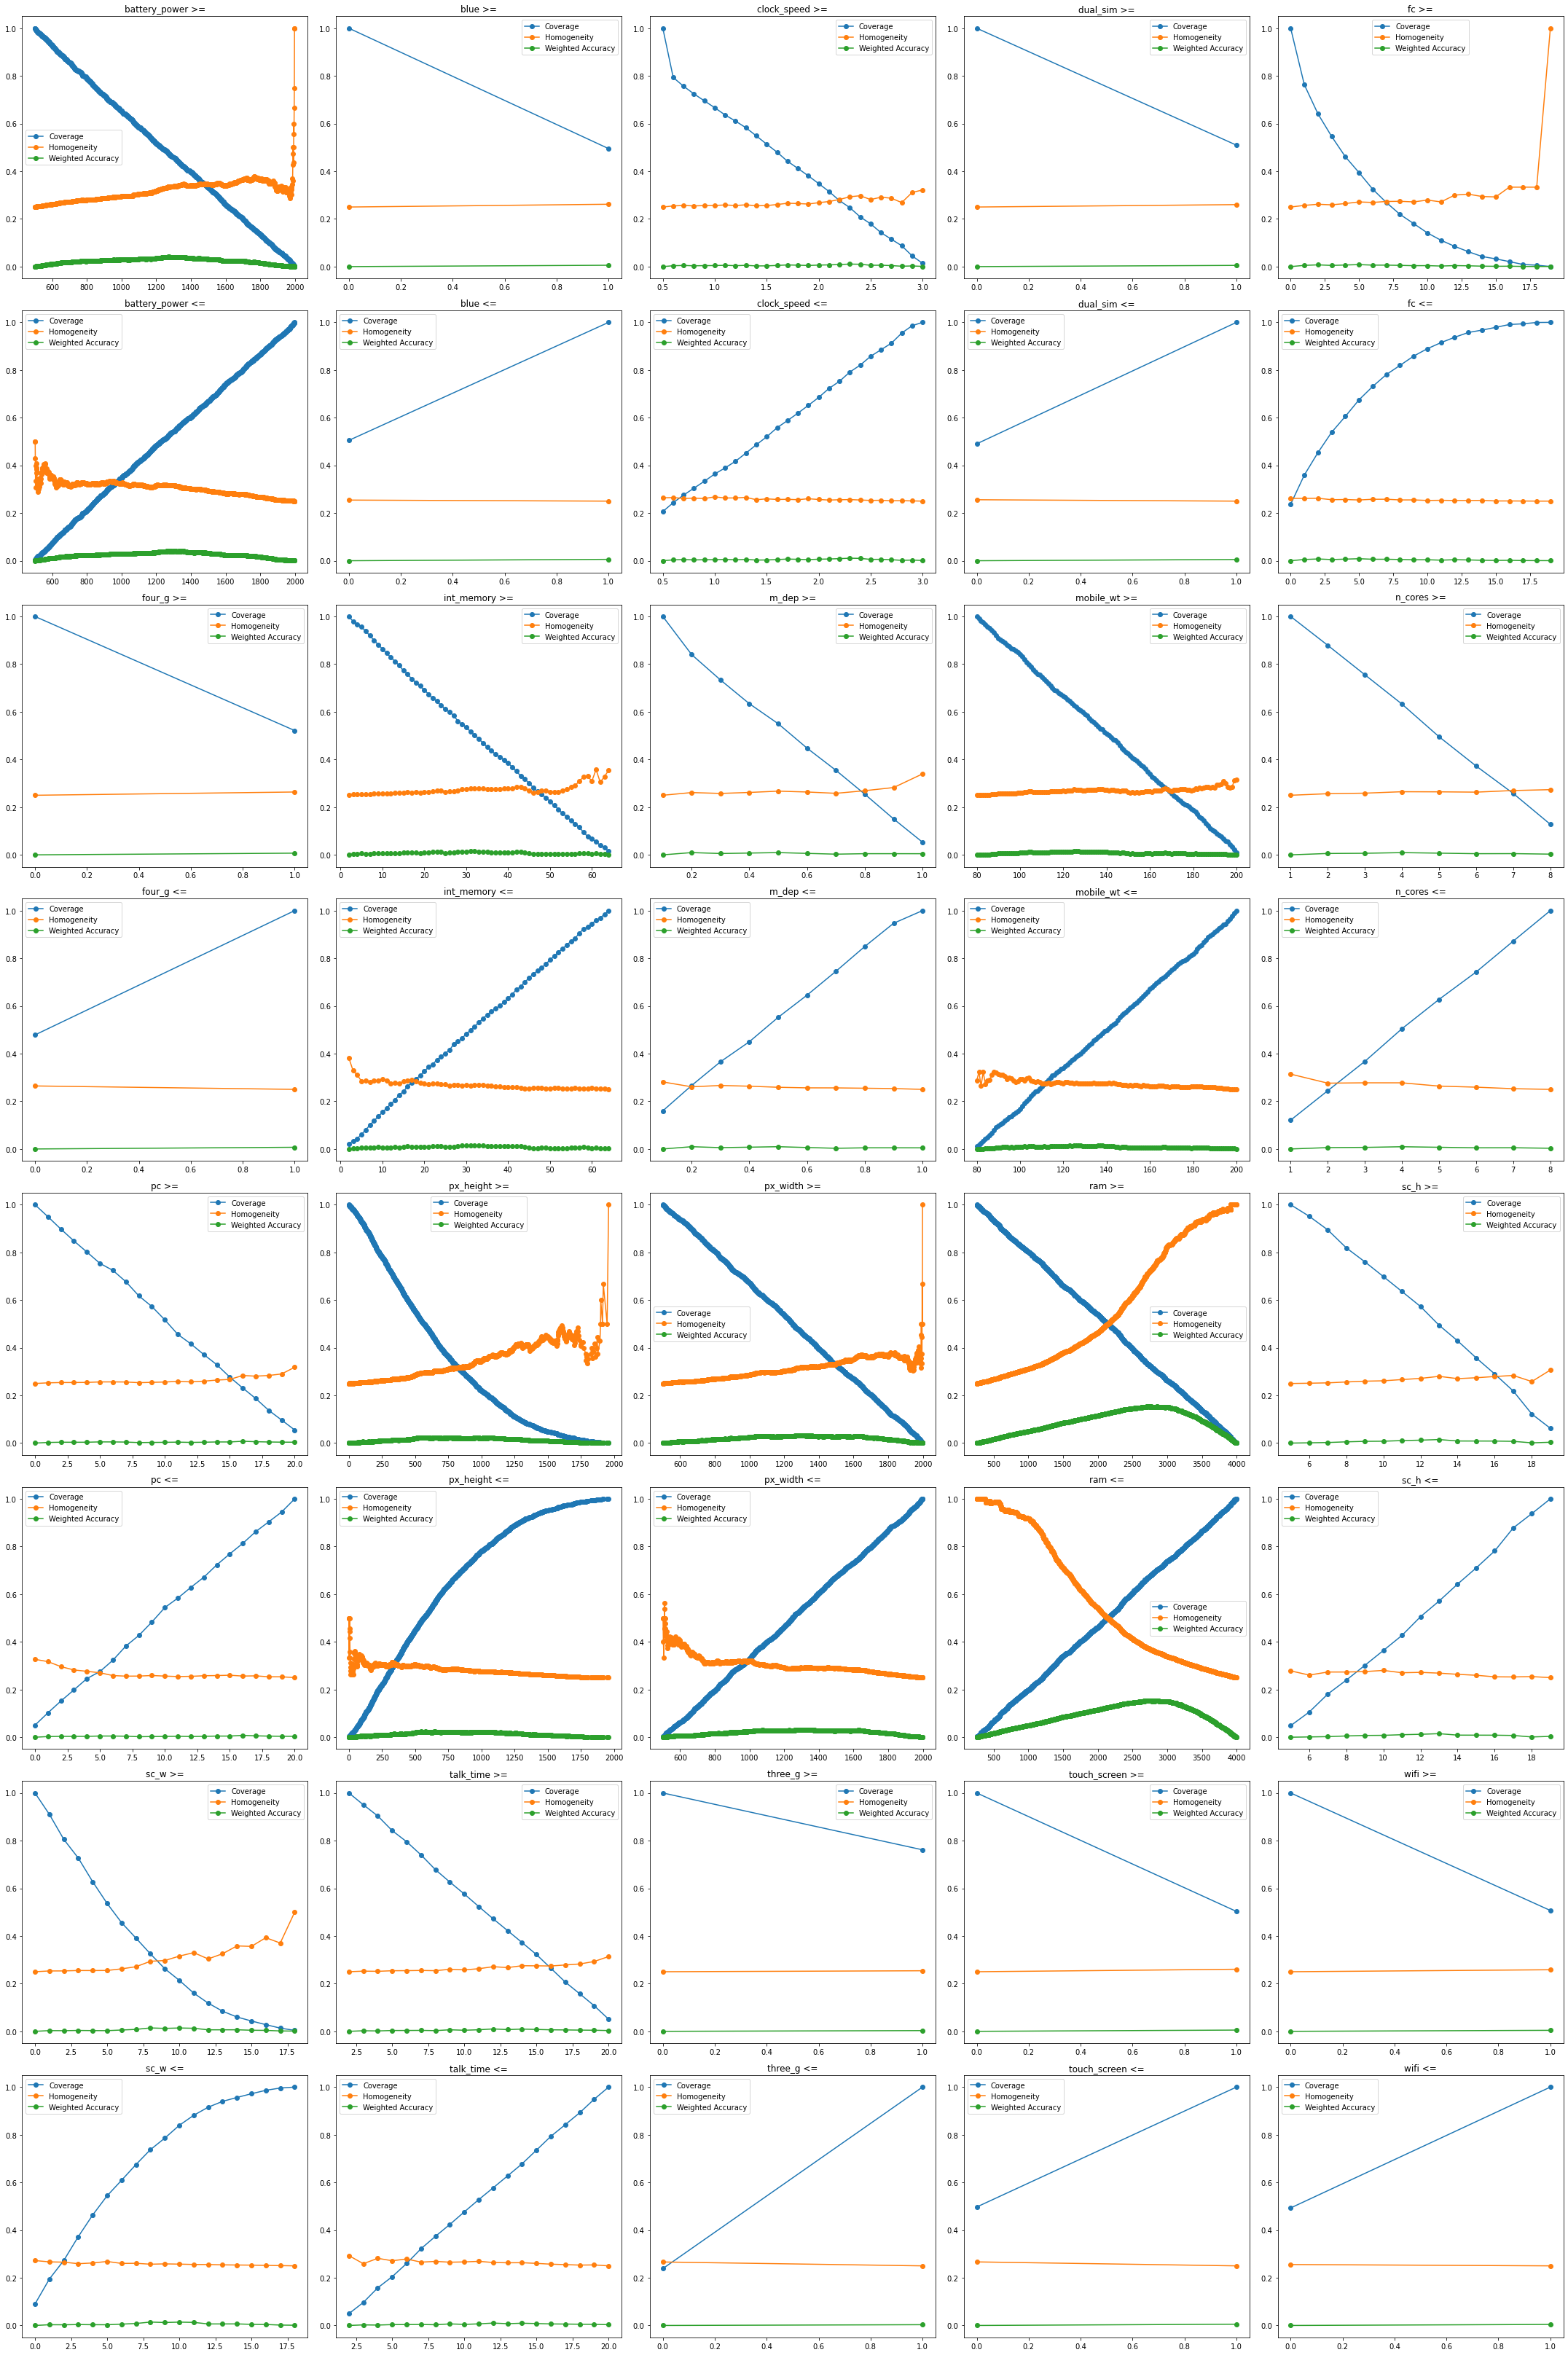

In [85]:
ncols = 5
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

pr = []
a = 500 / 2000 # 사후확률 바꿔야해요
pr.append(a)

pr_np = np.array(pr)


plt.figure(figsize=(30, 45)) 
for col in num_col[:]:
    ax1 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points = coverHomo(mobile_price, target_name, col, '>=')
    
    cover_np = np.array(cover)
    homo_np = np.array(homo)
    wa = cover_np * (homo_np - pr_np)
    
    ax1.plot(cut_points,cover,'-o')
    ax1.plot(cut_points,homo,'-o')
    ax1.plot(cut_points, wa, '-o')
    
    ax1.set_title(col +' >=')
    ax1.legend(['Coverage','Homogeneity', 'Weighted Accuracy'])
    ax1.set_ylim(-0.05,1.05)
    
    ax2 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points = coverHomo(mobile_price, target_name, col, '<=')
    ax2.plot(cut_points,cover,'-o')
    ax2.plot(cut_points,homo,'-o')
    ax2.plot(cut_points, wa, '-o')
    ax2.set_title(col +' <=')
    ax2.legend(['Coverage','Homogeneity', 'Weighted Accuracy'])
    ax2.set_ylim(-0.05,1.05)
    if n % (ncols) == 0 : i+=ncols
    n+=1

     
    
# plt.suptitle("Cover-Homo plot", fontsize=30, y=1)
plt.savefig('coverHomo.png', dpi=300, transparent=True, bbox_inches="tight") # save.figure (dpi=300, transparent=True)
plt.tight_layout()
plt.show()